<a href="https://colab.research.google.com/github/SID1060/Optimizing-energy-use-EE-399/blob/main/EE_399_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

# Load the Excel file
file_path = "/Energy consumption Dec 2023 (1).xlsx"
xls = pd.ExcelFile(file_path)

# Get the sheet names
sheet_names = xls.sheet_names

# Create a dictionary to store the dataframes
dfs = {}

# Iterate over each sheet and create a dataframe
for sheet_name in sheet_names:
    # Read the sheet into a dataframe
    df = pd.read_excel(file_path, sheet_name=sheet_name)

    # Assign a unique name to the dataframe
    df_name = f"df_{sheet_name}"

    # Store the dataframe in the dictionary
    dfs[df_name] = df

# Access the dataframes using their names
df_sheet1 = dfs["df_Sheet1"]
df_sheet2 = dfs["df_Sheet2"]
# ... and so on

# Print the first few rows of each dataframe
print("Sheet 1:")
print(df_sheet1)

print("Sheet 2:")
print(df_sheet2)


In [ ]:
# prompt: For the file /content/Energy consumption June 2023.xlsx make dataframes and give me name of each sheet in the excel

import pandas as pd

# Load the Excel file
file_path = "/content/Energy consumption June 2023.xlsx"
xls = pd.ExcelFile(file_path)

# Get the sheet names
sheet_names = xls.sheet_names

# Create a dictionary to store the dataframes
dfs = {}

# Iterate over each sheet and create a dataframe
for sheet_name in sheet_names:
    # Read the sheet into a dataframe
    df = pd.read_excel(file_path, sheet_name=sheet_name)

    # Assign a unique name to the dataframe
    df_name = f"df_{sheet_name}"

    # Store the dataframe in the dictionary
    dfs[df_name] = df

# Access the dataframes using their names
df_sheet1 = dfs["df_Sheet1"]
df_sheet2 = dfs["df_Sheet2"]
# ... and so on

# Print the first few rows of each dataframe
print("Sheet 1:")
print(df_sheet1.head())

print("Sheet 2:")
print(df_sheet2.head())

# Print the names of each sheet
print("Sheet names:")
print(sheet_names)


In [ ]:
import pandas as pd

# Load the Excel file
file_path = "/Energy consumption June 2023.xlsx"
xls = pd.ExcelFile(file_path)

# Read Sheet 2 into a dataframe
df_sheet2 = pd.read_excel(file_path, sheet_name="Sheet2")

# Print the dataframe
print(df_sheet2)


        Month  Aibaan  Beauki  Chimair  Duven  Emiet  Firpeal  Griwiksh  \
0  2023-10-19     262     212      194    215    284      272         0   
1  2023-11-19     248     155      217    215    307      265         0   
2  2023-12-19     121      79       85    121    129      110         0   
3  2023-01-20     245     162      194    210    248      261         0   
4  2023-02-20     248     172      205    215    249      261         0   
5  2023-03-20     240     162      200      0      0        0         0   
6  2023-04-20      69      40        0    131     96      145         0   
7  2023-05-20      70      40        0    130     99      143         0   
8  2023-06-20      66      35        0    134     75      138         0   
9  2023-07-20      70      28        0    135     50      141         0   
10 2023-08-20      76      47        0    132     59      155         0   
11 2023-09-20      84      57        0    141     66      168         0   
12 2023-10-20      97    

Mean Absolute Error: 445.03012670740475


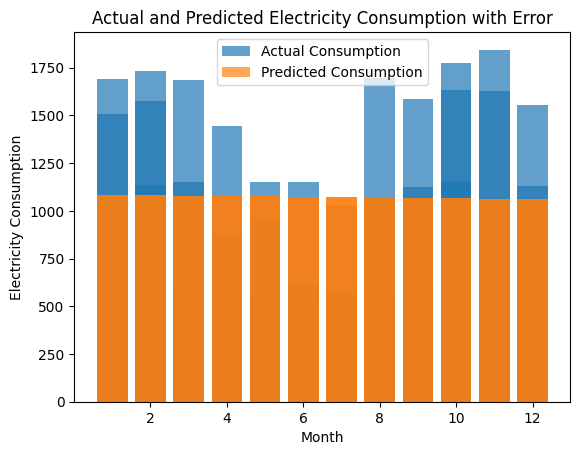

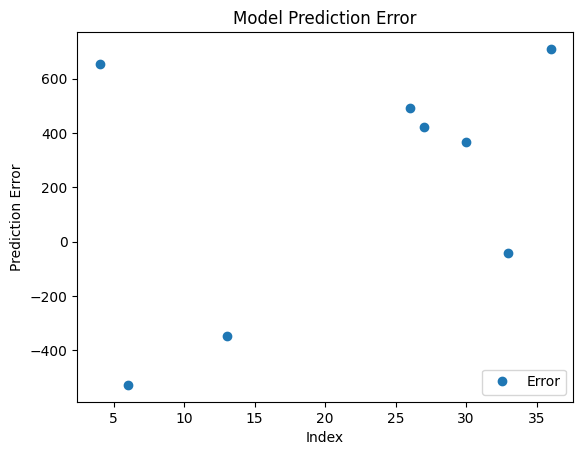

In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt

# Load the Excel file with the correct sheet name
file_path = "/Energy consumption June 2023.xlsx"
df = pd.read_excel(file_path, sheet_name="Sheet2")

# Feature Engineering: Extracting Year and Month from the 'Month' column
df['Month'] = pd.to_datetime(df['Month'], format='%b-%y')
df['Year'] = df['Month'].dt.year
df['Month'] = df['Month'].dt.month

# Assuming 'Total' is the target variable
X = df[['Year', 'Month']]
y = df['Total']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the testing set
predictions = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, predictions)
print(f'Mean Absolute Error: {mae}')

# Make predictions for the upcoming 2 years
future_months = pd.DataFrame({
    'Year': [2023] * 12 + [2024] * 12,
    'Month': list(range(1, 13)) * 2
})

future_predictions = model.predict(future_months[['Year', 'Month']])

# Plot the actual and predicted electricity consumption along with the error
plt.bar(df['Month'], df['Total'], label='Actual Consumption', alpha=0.7)
plt.bar(future_months['Month'], future_predictions, label='Predicted Consumption', alpha=0.7)
plt.xlabel('Month')
plt.ylabel('Electricity Consumption')
plt.title('Actual and Predicted Electricity Consumption with Error')
plt.legend()

# Plot the error
plt.figure()
plt.plot(X_test.index, y_test - predictions, marker='o', linestyle='None', label='Error')
plt.xlabel('Index')
plt.ylabel('Prediction Error')
plt.title('Model Prediction Error')
plt.legend()

plt.show()


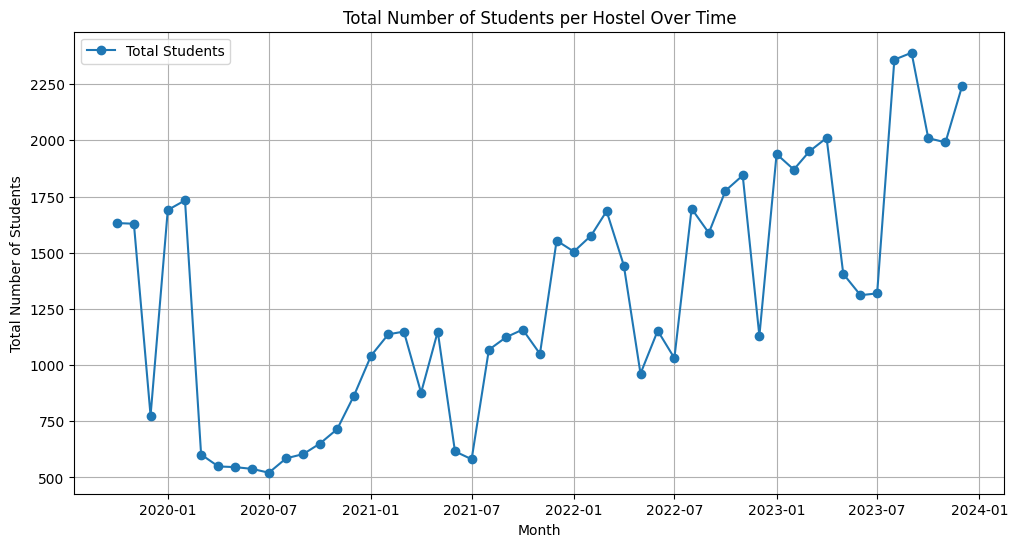

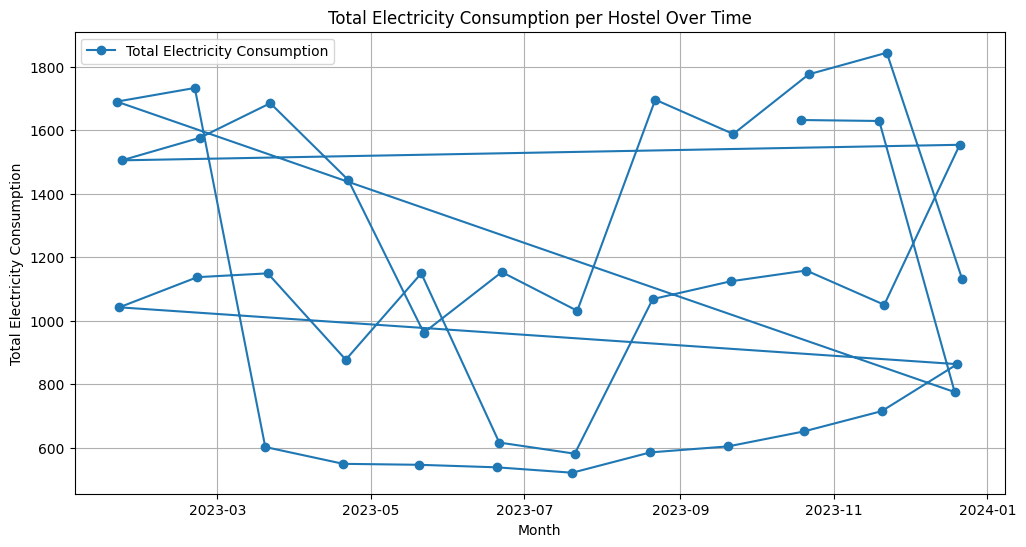

In [ ]:
# Load student per hostel data
student_data = pd.read_excel("/content/studentperhostel.xlsx")

# Load electricity consumption data
electricity_data = pd.read_excel("/content/Energy consumption June 2023.xlsx", sheet_name="Sheet2")

# Plot total students over time
plt.figure(figsize=(12, 6))
plt.plot(student_data['Month'], student_data['Total'], marker='o', label='Total Students')
plt.title('Total Number of Students per Hostel Over Time')
plt.xlabel('Month')
plt.ylabel('Total Number of Students')
plt.legend()
plt.grid(True)
plt.show()



# Plot total electricity consumption over time
plt.figure(figsize=(12, 6))
plt.plot(electricity_data['Month'], electricity_data['Total'], marker='o', label='Total Electricity Consumption')
plt.title('Total Electricity Consumption per Hostel Over Time')
plt.xlabel('Month')
plt.ylabel('Total Electricity Consumption')
plt.legend()
plt.grid(True)
plt.show()



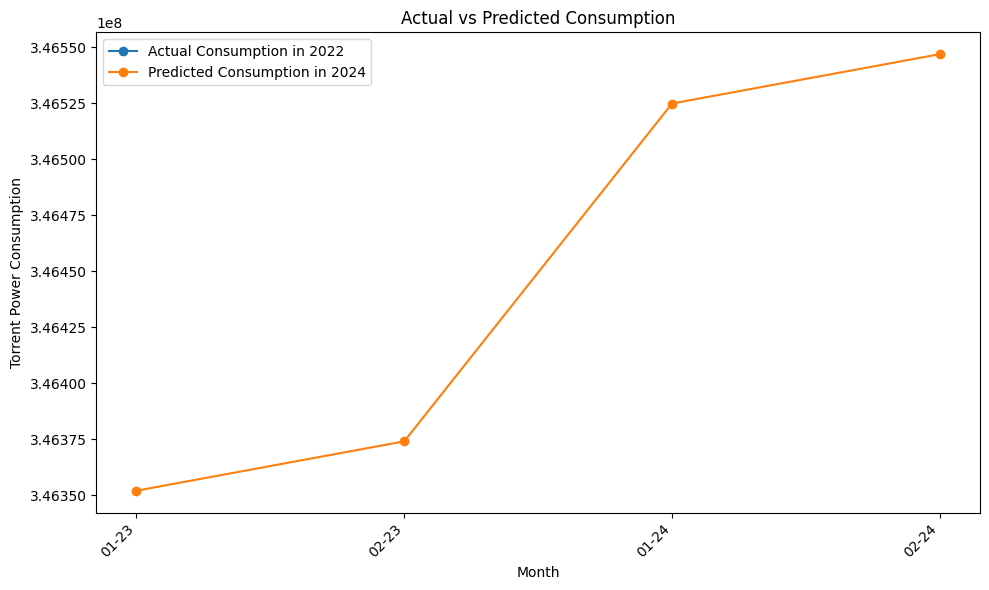

In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score

# Provided data
data = {
    'Month': ['Oct-19', 'Nov-19', 'Dec-19', 'Jan-20', 'Feb-20', 'Mar-20', 'Apr-20', 'May-20', 'Jun-20', 'Jul-20', 'Aug-20', 'Sep-20',
              'Oct-20', 'Nov-20', 'Dec-20', 'Jan-21', 'Feb-21', 'Mar-21', 'Apr-21', 'May-21', 'Jun-21', 'Jul-21', 'Aug-21', 'Sep-21',
              'Oct-21', 'Nov-21', 'Dec-21', 'Jan-22', 'Feb-22', 'Mar-22', 'Apr-22', 'May-22', 'Jun-22', 'Jul-22', 'Aug-22', 'Sep-22',
              'Oct-22', 'Nov-22', 'Dec-22', 'Jan-23', 'Feb-23', 'Mar-23', 'Apr-23', 'May-23', 'Jun-23'],
    'Torrent_Power': [674640, 583910, 454140, 463270, 452220, 458440, 410810, 548330, 588530, 645420, 652110, 639690, 635480, 492240,
                      491200, 448691, 467671, 630868, 730380, 730590, 759570, 755641, 756658, 768321, 866211, 592639, 595060, 588770,
                      599590, 776650, 1074660, 1012585, 1059300, 951575, 1120125, 1143525, 995150, 834550, 777275, 779675, 773625,
                      920675, 1162400, 1230725, 1266575],
}

# Creating DataFrame
df = pd.DataFrame(data)

# Feature Engineering
df['Year'] = df['Month'].str.split('-', expand=True)[1].astype(int)
df['Month_Num'] = pd.to_datetime(df['Month'], format='%b-%y').dt.month

# Model Selection and Training
model = LinearRegression()
model.fit(df[['Year', 'Month_Num']], df['Torrent_Power'])

# Predict upcoming months in 2023 and 2024
future_months = pd.DataFrame({
    'Year': [2023, 2023, 2024, 2024],
    'Month_Num': [1, 2, 1, 2],
})
predictions = model.predict(future_months)

# Append predictions to DataFrame
future_df = pd.DataFrame({
    'Year': future_months['Year'],
    'Month_Num': future_months['Month_Num'],
    'Month': future_months.apply(lambda row: f"{row['Month_Num']:02d}-{str(row['Year'])[2:]}", axis=1),
    'Torrent_Power_Predicted': predictions,
})

# Actual Consumption in 2022
actual_2022 = df[df['Year'] == 2022]

# Plotting Actual vs Predicted Consumption
plt.figure(figsize=(10, 6))
plt.plot(actual_2022['Month'], actual_2022['Torrent_Power'], label='Actual Consumption in 2022', marker='o')
plt.plot(future_df['Month'], future_df['Torrent_Power_Predicted'], label='Predicted Consumption in 2024', marker='o')
plt.xlabel('Month')
plt.ylabel('Torrent Power Consumption')
plt.title('Actual vs Predicted Consumption')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()

# print(f'Mean Squared Error: {mse}')
# print(f'R-squared: {r2}')
# # Model Evaluation
# mse = mean_squared_error(actual_2022['Torrent_Power'], model.predict(actual_2022[['Year', 'Month_Num']]))
# r2 = r2_score(actual_2022['Torrent_Power'], model.predict(actual_2022[['Year', 'Month_Num']]))




In [ ]:
# Find the maximum electricity consumption for each hostel and the corresponding month
max_consumption_per_hostel = df_sheet2.iloc[:, 1:-1].max()
max_month_per_hostel = df_sheet2.iloc[:, 1:-1].idxmax()

# Find the maximum electricity consumption overall and the corresponding month
max_consumption_total = df_sheet2["Total"].max()
max_month_total = df_sheet2["Total"].idxmax()

# Print the results
print("Maximum electricity consumption per hostel:")
print(max_consumption_per_hostel)
print("Corresponding month per hostel:")
print(max_month_per_hostel)
print("Maximum electricity consumption overall:")
print(max_consumption_total)
print("Corresponding month overall:")
print(max_month_total)


Maximum electricity consumption per hostel:
Aibaan      262
Beauki      212
Chimair     217
Duven       215
Emiet       307
Firpeal     272
Griwiksh    112
Hiqom       271
Ijokha      187
Jurqia      229
Kyzeel      274
Lekhang      98
dtype: int64
Corresponding month per hostel:
Aibaan       0
Beauki       0
Chimair      1
Duven        0
Emiet        1
Firpeal      0
Griwiksh    29
Hiqom       29
Ijokha      29
Jurqia       3
Kyzeel      36
Lekhang     31
dtype: int64
Maximum electricity consumption overall:
1844
Corresponding month overall:
37


In [ ]:
# Find the maximum consumption in any month by any hostel
max_consumption_any_hostel = df_sheet2.iloc[:, 1:-1].max().max()

# Print the result
print("Maximum consumption in any month by any hostel:", max_consumption_any_hostel)


Maximum consumption in any month by any hostel: 307


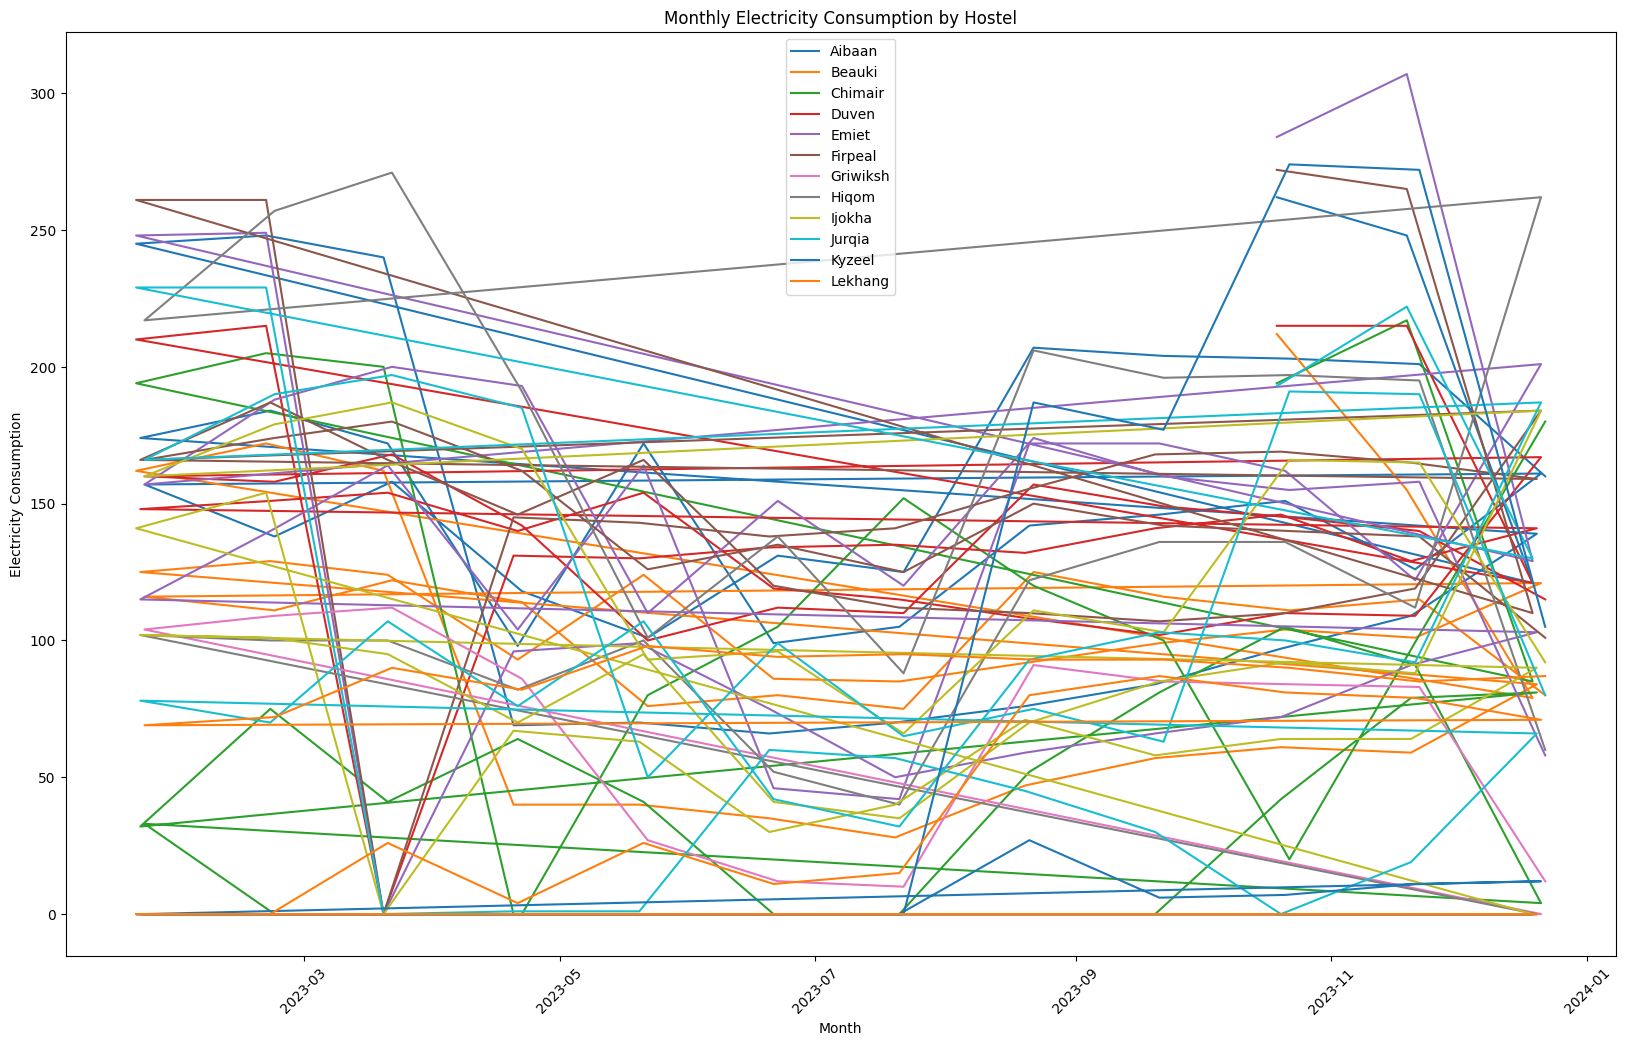

In [ ]:
import matplotlib.pyplot as plt

# Set the figure size
plt.figure(figsize=(20, 12))

# Iterate over each hostel column (excluding the "Month" and "Total" columns)
for column in df_sheet2.columns[1:-1]:
    # Plot the line graph for each hostel
    plt.plot(df_sheet2["Month"], df_sheet2[column], label=column)

# Set the x-axis label
plt.xlabel("Month")

# Set the y-axis label
plt.ylabel("Electricity Consumption")

# Set the title of the graph
plt.title("Monthly Electricity Consumption by Hostel")

# Add a legend
plt.legend()

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45)

# Display the graph
plt.show()

In [ ]:
# Calculate the average electricity consumption for each hostel
average_consumption_per_hostel = df_sheet2.iloc[:, 1:-1].mean()

# Print the results
print("Average electricity consumption per hostel:")
print(average_consumption_per_hostel)

Average electricity consumption per hostel:
Aibaan      148.128205
Beauki      100.435897
Chimair      71.153846
Duven       139.179487
Emiet       137.333333
Firpeal     153.435897
Griwiksh     20.897436
Hiqom        88.743590
Ijokha       89.435897
Jurqia      100.512821
Kyzeel       27.641026
Lekhang      39.179487
dtype: float64


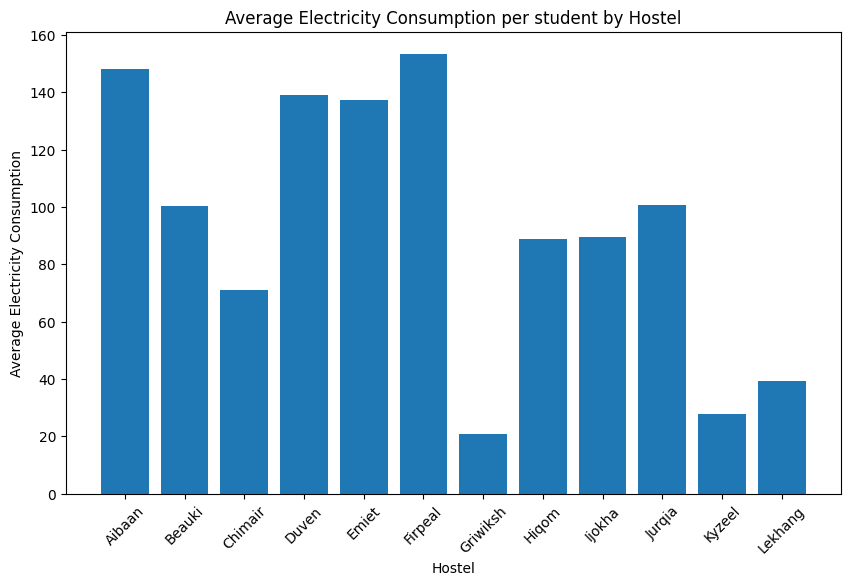

In [ ]:
import matplotlib.pyplot as plt

# Calculate the average electricity consumption for each hostel
average_consumption_per_hostel = df_sheet2.iloc[:, 1:-1].mean()

# Set the figure size
plt.figure(figsize=(10, 6))

# Create a bar plot for the average consumption per hostel
plt.bar(average_consumption_per_hostel.index, average_consumption_per_hostel)

# Set the x-axis label
plt.xlabel("Hostel")

# Set the y-axis label
plt.ylabel("Average Electricity Consumption")

# Set the title of the graph
plt.title("Average Electricity Consumption per student by Hostel")

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45)

# Display the graph
plt.show()

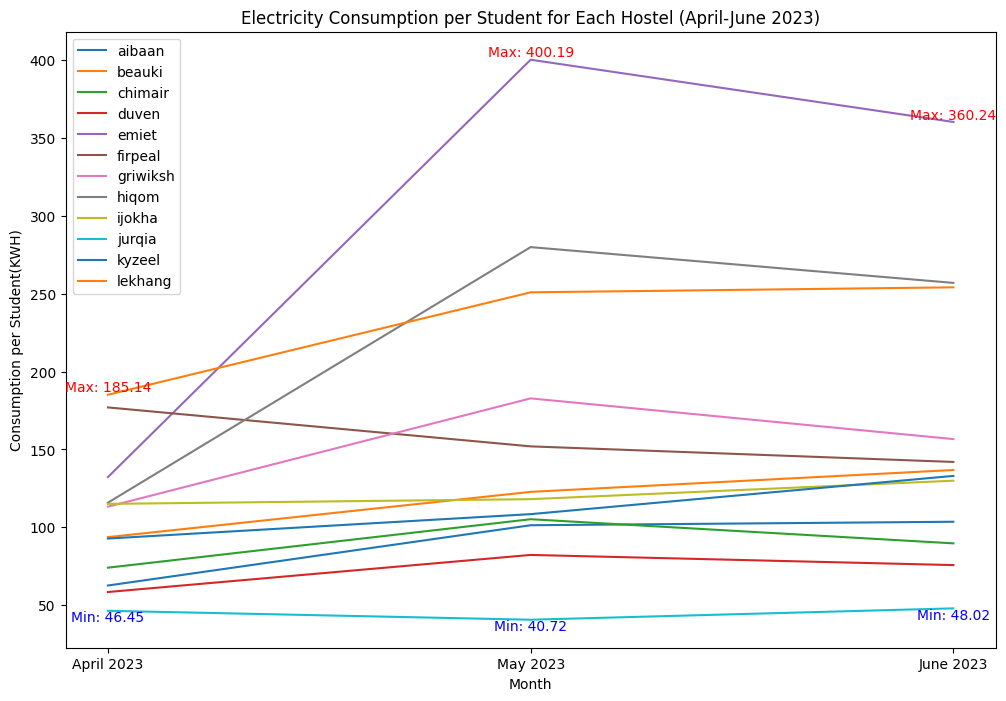

In [ ]:
#haritha sheet
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Given data for April, May, and June 2023 for each hostel and consumption per student
data = {
    'aibaan': [62.68, 101.37, 103.61],
    'beauki': [93.72, 122.79, 136.83],
    'chimair': [74.13, 105.24, 89.74],
    'duven': [58.51, 82.31, 75.79],
    'emiet': [132.28, 400.19, 360.24],
    'firpeal': [177, 152, 142],
    'griwiksh': [113.29, 182.80, 156.68],
    'hiqom': [115.85, 279.90, 256.93],
    'ijokha': [115.08, 118.11, 129.96],
    'jurqia': [46.45, 40.72, 48.02],
    'kyzeel': [92.82, 108.50, 133.03],
    'lekhang': [185.14, 250.88, 254.09]
}

# Create a DataFrame from the given data
df = pd.DataFrame(data)

# Plot hostel vs consumption per student
plt.figure(figsize=(12, 8))
for hostel in df.columns:
    plt.plot(['April 2023', 'May 2023', 'June 2023'], df[hostel], label=hostel)
for month in df.index:
    max_consumption = df.loc[month].max()
    min_consumption = df.loc[month].min()
    plt.text(month, max_consumption, f'Max: {max_consumption:.2f}', ha='center', va='bottom', color='red')
    plt.text(month, min_consumption, f'Min: {min_consumption:.2f}', ha='center', va='top', color='blue')
plt.xlabel('Month')
plt.ylabel('Consumption per Student(KWH)')
plt.title('Electricity Consumption per Student for Each Hostel (April-June 2023)')
plt.legend()
plt.show()


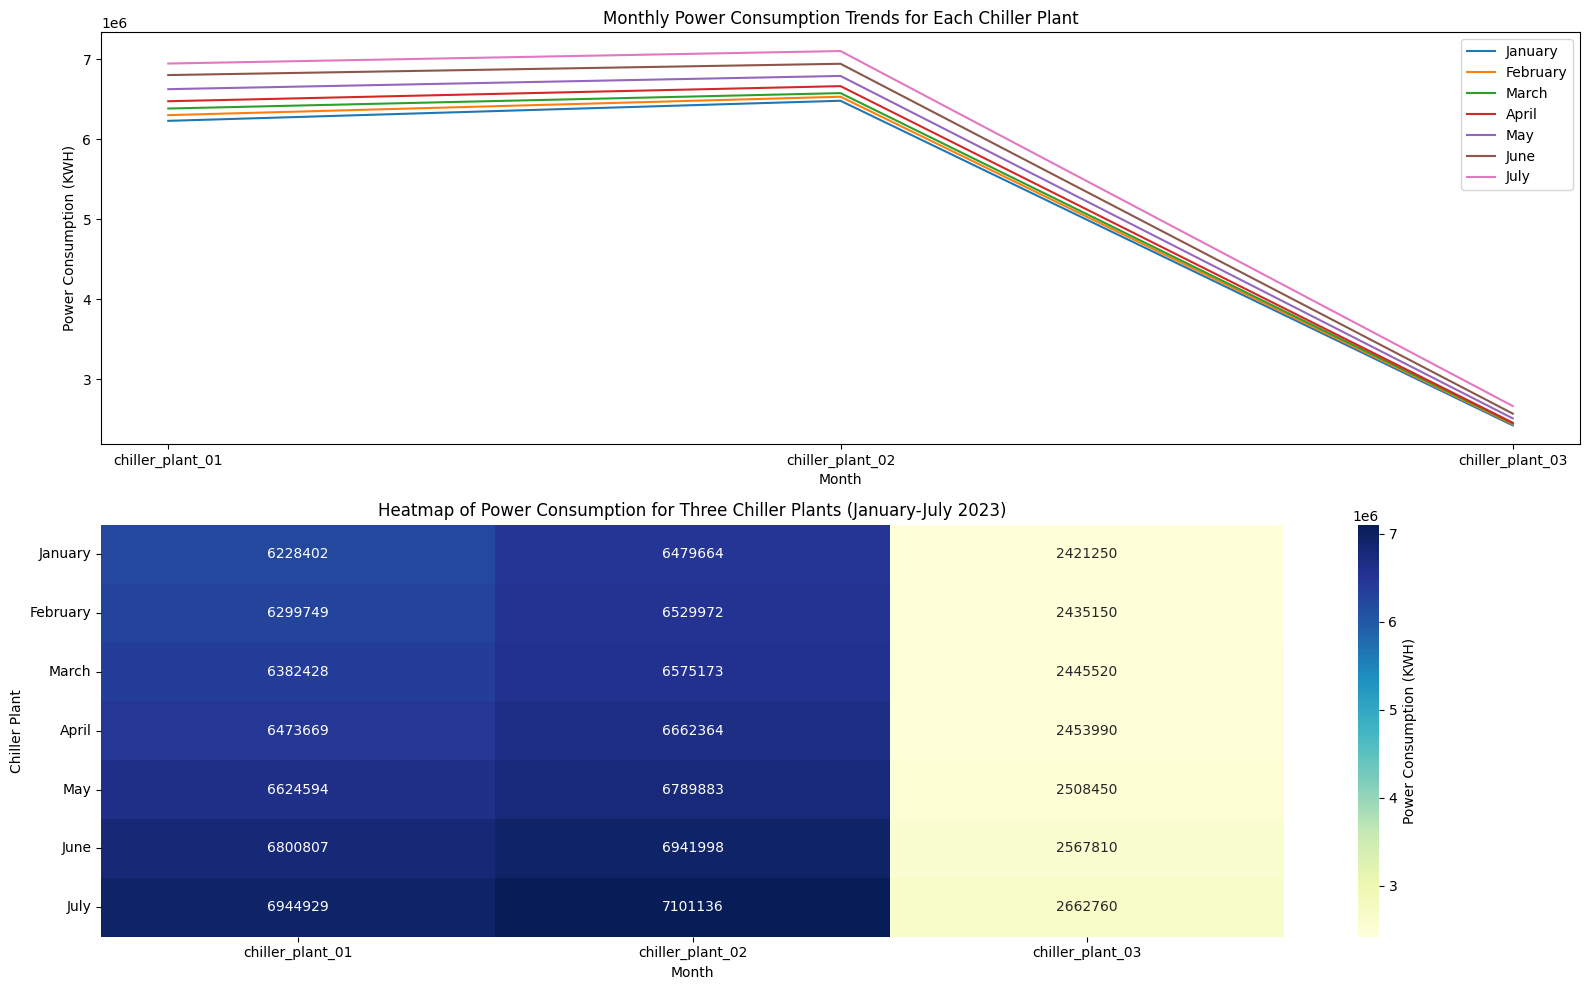

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Given data for January to July 2023 for three chiller plants in KWH
data = {
    'January': {'chiller_plant_01': 6228402, 'chiller_plant_02': 6479664, 'chiller_plant_03': 2421250},
    'February': {'chiller_plant_01': 6299749, 'chiller_plant_02': 6529972, 'chiller_plant_03': 2435150},
    'March': {'chiller_plant_01': 6382428, 'chiller_plant_02': 6575173, 'chiller_plant_03': 2445520},
    'April': {'chiller_plant_01': 6473669, 'chiller_plant_02': 6662364, 'chiller_plant_03': 2453990},
    'May': {'chiller_plant_01': 6624594, 'chiller_plant_02': 6789883, 'chiller_plant_03': 2508450},
    'June': {'chiller_plant_01': 6800807, 'chiller_plant_02': 6941998, 'chiller_plant_03': 2567810},
    'July': {'chiller_plant_01': 6944929, 'chiller_plant_02': 7101136, 'chiller_plant_03': 2662760},
}

# Create a DataFrame from the given data
df = pd.DataFrame(data)

# Plot the power consumption for each chiller plant over the months
plt.figure(figsize=(16, 10))

# Subplot for individual chiller plant trends
plt.subplot(2, 1, 1)
for chiller_plant in df.columns:
    plt.plot(df.index, df[chiller_plant], label=f'{chiller_plant}')
plt.xlabel('Month')
plt.ylabel('Power Consumption (KWH)')
plt.title('Monthly Power Consumption Trends for Each Chiller Plant')
plt.legend()

# Subplot for heat map
plt.subplot(2, 1, 2)
sns.heatmap(df.T, cmap='YlGnBu', annot=True, fmt=".0f", cbar_kws={'label': 'Power Consumption (KWH)'})
plt.xlabel('Month')
plt.ylabel('Chiller Plant')
plt.title('Heatmap of Power Consumption for Three Chiller Plants (January-July 2023)')

plt.tight_layout()
plt.show()


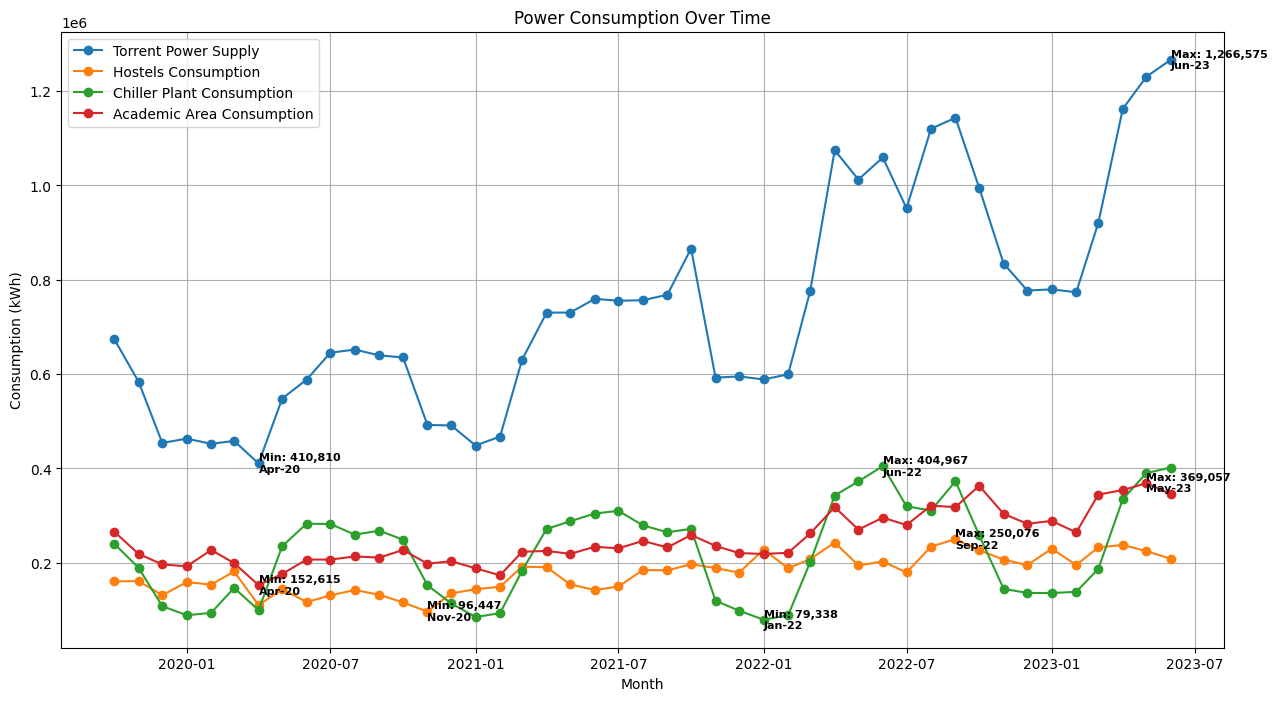

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Sample data for Total Supply and Consumption over several months
data = {
    'Month': ['Oct-19', 'Nov-19', 'Dec-19', 'Jan-20', 'Feb-20', 'Mar-20', 'Apr-20', 'May-20', 'Jun-20', 'Jul-20', 'Aug-20', 'Sep-20', 'Oct-20', 'Nov-20', 'Dec-20', 'Jan-21', 'Feb-21', 'Mar-21', 'Apr-21', 'May-21', 'Jun-21', 'Jul-21', 'Aug-21', 'Sep-21', 'Oct-21', 'Nov-21', 'Dec-21', 'Jan-22', 'Feb-22', 'Mar-22', 'Apr-22', 'May-22', 'Jun-22', 'Jul-22', 'Aug-22', 'Sep-22', 'Oct-22', 'Nov-22', 'Dec-22', 'Jan-23', 'Feb-23', 'Mar-23', 'Apr-23', 'May-23', 'Jun-23'],
    'Torrent Power Supply': [674640, 583910, 454140, 463270, 452220, 458440, 410810, 548330, 588530, 645420, 652110, 639690, 635480, 492240, 491200, 448691, 467671, 630868, 730380, 730590, 759570, 755641, 756658, 768321, 866211, 592639, 595060, 588770, 599590, 776650, 1074660, 1012585, 1059300, 951575, 1120125, 1143525, 995150, 834550, 777275, 779675, 773625, 920675, 1162400, 1230725, 1266575],
    'Hostels Consumption': [160599, 161295, 131218, 159114, 153683, 181699, 110311, 144032, 116748, 130899, 142393, 132149, 116155, 96447, 135109, 144034, 149278, 191951, 190579, 154294, 142219, 149801, 184793, 184008, 196999, 188892, 179188, 228101, 188374, 207945, 242955, 194550, 202772, 179571, 234362, 250076, 226713, 206863, 195158, 229922, 195453, 232502, 238035, 224595, 208463],
    'Chiller Plant Consumption': [240733, 189448, 108157, 88799, 93999, 146799, 99695, 235300, 283031, 282263, 259750, 268080, 249066, 152435, 114026, 84975, 93383, 183439, 271895, 288130, 304441, 310180, 279343, 264773, 272034, 119507, 98480, 79338, 88809, 201611, 342692, 372540, 404967, 319790, 310868, 372987, 258658, 144830, 136168, 135875, 138480, 187072, 334884, 390358, 402050],
    'Academic Area Consumption': [266269, 218907, 196626, 192539, 227101, 199446, 152615, 176404, 206978, 206744, 213572, 210938, 227299, 198074, 203434, 188357, 173512, 223428, 225247, 218954, 234032, 230678, 246500, 232477, 259050, 235786, 220596, 218749, 221297, 262350, 318069, 270475, 295695, 280106, 321176, 318043, 363276, 303884, 282639, 288919, 264350, 344671, 354165, 369057, 345433],
}

# Create a DataFrame from the data
df = pd.DataFrame(data)
df['Month'] = pd.to_datetime(df['Month'], format='%b-%y')  # Convert Month to datetime format for proper plotting

# Plotting
plt.figure(figsize=(15, 8))

# Plotting each category
plt.plot(df['Month'], df['Torrent Power Supply'], label='Torrent Power Supply', marker='o')
plt.plot(df['Month'], df['Hostels Consumption'], label='Hostels Consumption', marker='o')
plt.plot(df['Month'], df['Chiller Plant Consumption'], label='Chiller Plant Consumption', marker='o')
plt.plot(df['Month'], df['Academic Area Consumption'], label='Academic Area Consumption', marker='o')

# Annotate max and min points for each category beside the graph
for column, color, x_offset, y_offset in zip(['Torrent Power Supply', 'Hostels Consumption', 'Chiller Plant Consumption', 'Academic Area Consumption'],
                                             ['blue', 'orange', 'green', 'purple'],
                                             [0, 0, 0, 0],
                                             [15, -15, -15, 15]):
    max_val = df[column].max()
    min_val = df[column].min()
    max_month = df.loc[df[column].idxmax(), 'Month']
    min_month = df.loc[df[column].idxmin(), 'Month']

    plt.text(max_month, max_val, f'Max: {max_val:,}\n{max_month:%b-%y}', color=black
             '', weight='bold', ha='left', va='center', fontsize=8)
    plt.text(min_month, min_val, f'Min: {min_val:,}\n{min_month:%b-%y}', color=color, weight='bold', ha='left', va='center', fontsize=8)

plt.xlabel('Month')
plt.ylabel('Consumption (kWh)')
plt.title('Power Consumption Over Time')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
data = [
    ['Jan-21', 448691, 53492, 502183, 144034, 188357, 84975],
    ['Feb-21', 467671, 55250, 522921, 149278, 173512, 93383],
    ['Mar-21', 630868, 72111, 702979, 191951, 223428, 183439],
    ['Apr-21', 730380, 66687, 797067, 190579, 225247, 271895],
    ['May-21', 730590, 59496, 790086, 154294, 218954, 288130],
    ['Jun-21', 759570, 59402, 818972, 142219, 234032, 304441],
    ['Jul-21', 755641, 46458, 802099, 149801, 230678, 310180],
    ['Aug-21', 756658, 47706, 804364, 184793, 246500, 279343],
    ['Sep-21', 768321, 38952, 807273, 184008, 232477, 264773],
    ['Oct-21', 866211, 61593, 927804, 196999, 259050, 272034],
    ['Nov-21', 592639, 57761, 650400, 188892, 235786, 119507],
    ['Dec-21', 595060, 47951, 643011, 179188, 220596, 98480],
    ['Jan-22', 588770, 57827, 646597, 228101, 218749, 79338],
    ['Feb-22', 599590, 85689, 685279, 188374, 221297, 88809],
    ['Mar-22', 776650, 67652, 844302, 207945, 262350, 201611],
    ['Apr-22', 1074660, 51715, 1126375, 242955, 318069, 342692],
    ['May-22', 1012585, 51965, 1064550, 194550, 270475, 372540],
    ['Jun-22', 1059300, 57952, 1117252, 202772, 295695, 404967],
    ['Jul-22', 951575, 42758, 994333, 179571, 280106, 319790],
    ['Aug-22', 1120125, 43645, 1163770, 234362, 321176, 310868],
    ['Sep-22', 1143525, 53446, 1196971, 250076, 318043, 372987],
    ['Oct-22', 995150, 58693, 1053843, 226713, 363276, 258658],
    ['Nov-22', 834550, 53070, 887620, 206863, 303884, 144830],
    ['Dec-22', 777275, 55804, 833079, 195158, 282639, 136168],
    ['Jan-23', 779675, 54817, 834492, 229922, 288919, 135875],
    ['Feb-23', 773625, 84883, 858508, 195453, 264350, 138480],
    ['Mar-23', 920675, 63045, 983720, 232502, 344671, 187072],
    ['Apr-23', 1162400, 63568, 1225968, 238035, 354165, 334884],
    ['May-23', 1230725, 68914, 1299639, 221595, 361336, 390358],
    ['Jun-23', 1266575, 44914, 1311489, 207053, 319602, 402050],
    ['Jul-23', 1126300, 39158, 1165458, 176547, 284436, 430485],
    ['Aug-23', 1574925, 45671, 1620596, 259430, 363065, 559632],
    ['Sep-23', 1380575, 46775, 1427350, 260938, 330047, 450930],
    ['Oct-23', 1244475, 59294, 1303769, 226543, 301294, 335380],
    ['Nov-23', 924925, 49720, 974645, 220490, 269216, 141316],
    ['Dec-23', 956650, 60572, 1017222, 206735, 265357, 142560]
]
month = [row[0] for row in data]
Torrent = [row[1] for row in data]
Solar = [row[2] for row in data]
Total = [row[3] for row in data]
hostel = [row[4] for row in data]
Academic_area = [row[5] for row in data]
Chiller = [row[6] for row in data]

print(month)
print(Torrent)
print(Solar)
print(Total)
print(hostel)
print(Academic_area)
print(Chiller)


In [ ]:
columns = ['Month', 'Torrent', 'Solar', 'Total', 'Hostel', 'Academic_area', 'Chiller']

df_given = pd.DataFrame(data, columns=columns)

print(df_given)

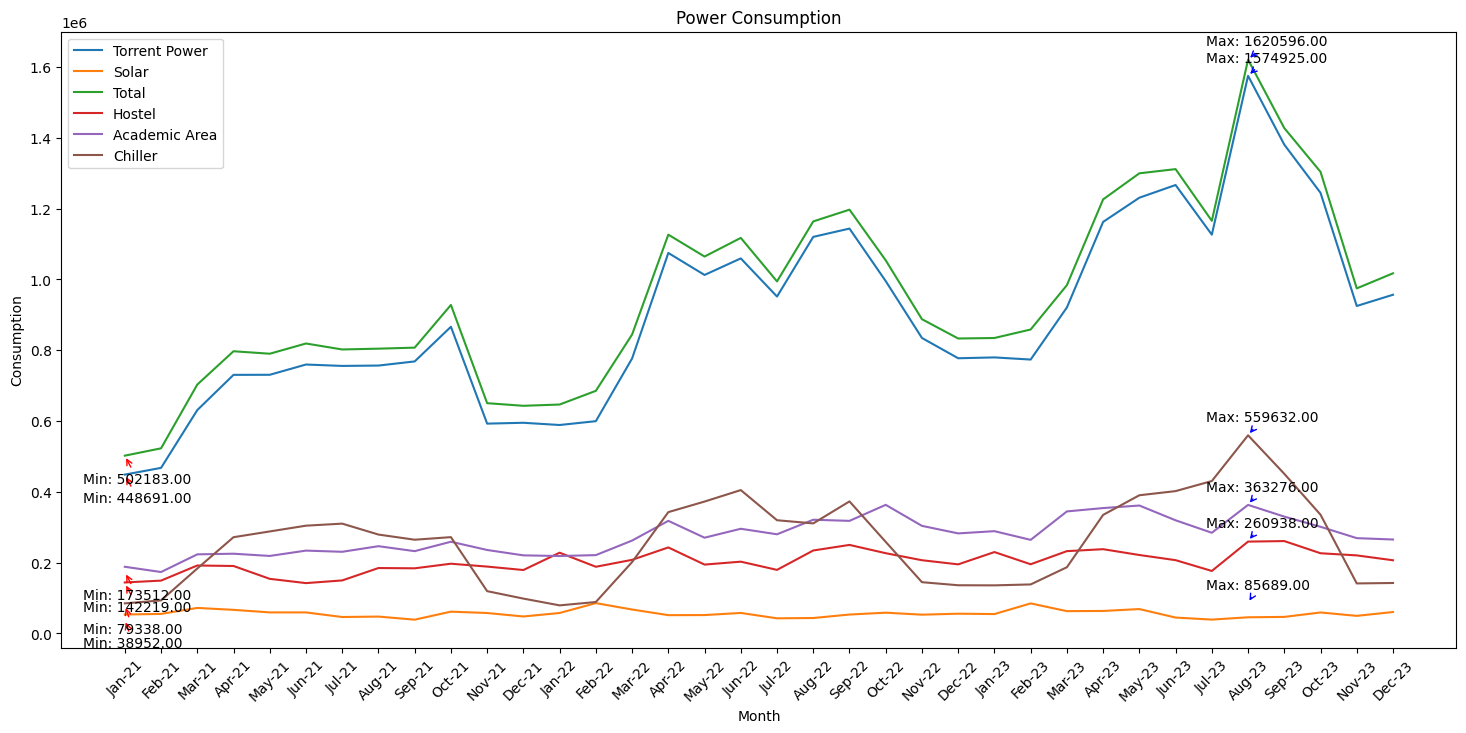

In [ ]:
import matplotlib.pyplot as plt

# Plot
plt.figure(figsize=(18, 8))
plt.plot(df_given['Month'], df_given['Torrent'], label='Torrent Power')
plt.plot(df_given['Month'], df_given['Solar'], label='Solar')
plt.plot(df_given['Month'], df_given['Total'], label='Total')
plt.plot(df_given['Month'], df_given['Hostel'], label='Hostel')
plt.plot(df_given['Month'], df_given['Academic_area'], label='Academic Area')
plt.plot(df_given['Month'], df_given['Chiller'], label='Chiller')
plt.xlabel('Month')
plt.ylabel('Consumption')
plt.title('Power Consumption')
plt.xticks(rotation=45)
plt.legend()

# Find the maximum and minimum values for each line
max_values = {'Torrent Power': df_given['Torrent'].max(), 'Solar': df_given['Solar'].max(), 'Total': df_given['Total'].max(),
              'Hostel': df_given['Hostel'].max(), 'Academic Area': df_given['Academic_area'].max(), 'Chiller': df_given['Chiller'].max()}
min_values = {'Torrent Power': df_given['Torrent'].min(), 'Solar': df_given['Solar'].min(), 'Total': df_given['Total'].min(),
              'Hostel': df_given['Hostel'].min(), 'Academic Area': df_given['Academic_area'].min(), 'Chiller': df_given['Chiller'].min()}

# Annotate the maximum and minimum values
for column, max_val in max_values.items():
    plt.annotate(f'Max: {max_val:.2f}', xy=(df_given['Month'][df_given['Torrent'].idxmax()], max_val),
                 xytext=(-30, 10), textcoords='offset points', arrowprops=dict(arrowstyle='->', color='blue'))
for column, min_val in min_values.items():
    plt.annotate(f'Min: {min_val:.2f}', xy=(df_given['Month'][df_given['Torrent'].idxmin()], min_val),
                 xytext=(-30, -20), textcoords='offset points', arrowprops=dict(arrowstyle='->', color='red'))

plt.show()


In [ ]:
import numpy as np

# Data for Apr-21, Apr-22, Apr-23
data_apr = {
    'Torrent_Power': [730380, 1074660, 1162400],
    'Solar': [66687, 51715, 63568],
    'Total': [797067, 1126375, 1225968],
    'Academic_Area': [225247, 318069, 354165],
    'Chiller': [271895, 342692, 334884]
}

# Calculate CAGR
def calculate_cagr(data):
    start_value = data[0]
    end_value = data[-1]
    num_years = len(data) - 1  # Number of years, considering start year
    cagr = (end_value / start_value) ** (1 / num_years) - 1
    return cagr

cagr_values = {}
for category, values in data_apr.items():
    cagr_values[category] = calculate_cagr(values)

# Project values for Apr-24, Apr-25, and Apr-26
def project_values(start_value, cagr, num_years):
    projected_values = []
    for year in range(1, num_years + 1):
        projected_value = start_value * (1 + cagr) ** year
        projected_values.append(projected_value)
    return projected_values

# Calculate projected values for each category
num_years_projected = 3  # Number of years to project
projected_values_apr = {}
for category, cagr in cagr_values.items():
    start_value = data_apr[category][-1]  # Value for Apr-23
    projected_values_apr[category] = project_values(start_value, cagr, num_years_projected)

# Display the values
print("Values for Apr-21, Apr-22, Apr-23:")
print("==================================")
for category, values in data_apr.items():
    print(f"{category}: {values}")

print("\nProjected values for Apr-24, Apr-25, Apr-26:")
print("===========================================")
for category, values in projected_values_apr.items():
    print(f"{category}: {values}")


Values for Apr-21, Apr-22, Apr-23:
Torrent_Power: [730380, 1074660, 1162400]
Solar: [66687, 51715, 63568]
Total: [797067, 1126375, 1225968]
Academic_Area: [225247, 318069, 354165]
Chiller: [271895, 342692, 334884]

Projected values for Apr-24, Apr-25, Apr-26:
Torrent_Power: [1466421.9940149535, 1849959.9660450723, 2333811.065257786]
Solar: [62063.638305859524, 60594.87792223372, 59160.87633012248]
Total: [1520447.004127459, 1885660.223072841, 2338598.1012338144]
Academic_Area: [444098.13839225937, 556868.0036804042, 698273.527210993]
Chiller: [371655.8618795456, 412465.4497361113, 457756.1251573944]


In [ ]:
import pandas as pd

# Data for Jan-21, Jan-22, Jan-23
data_jan = {
    'Torrent_Power': [448691, 588770, 779675],
    'Solar': [53492, 57827, 54817],
    'Total': [502183, 646597, 834492],
    'Academic_Area': [188357, 218749, 288919],
    'Chiller': [84975, 79338, 135875]
}

# Calculate CAGR
def calculate_cagr(data):
    start_value = data[0]
    end_value = data[-1]
    num_years = len(data) - 1  # Number of years, considering start year
    if start_value == 0:
        start_value = data[1] if data[1] != 0 else data[2]  # Choose non-zero value as start value
    if end_value == 0:
        end_value = data[-2] if data[-2] != 0 else data[-3]  # Choose non-zero value as end value
    cagr = (end_value / start_value) ** (1 / num_years) - 1
    return cagr

cagr_values_jan = {}
for category, values in data_jan.items():
    cagr_values_jan[category] = calculate_cagr(values)

# Project values for Jan-24, Jan-25, and Jan-26
def project_values(start_value, cagr, num_years):
    projected_values = []
    for year in range(1, num_years + 1):
        projected_value = start_value * (1 + cagr) ** year
        projected_values.append(projected_value)
    return projected_values

# Calculate projected values for each category
num_years_projected = 3  # Number of years to project
projected_values_jan = {}
for category, cagr in cagr_values_jan.items():
    start_value = data_jan[category][-1]  # Value for Jan-23
    projected_values_jan[category] = project_values(start_value, cagr, num_years_projected)

# Create DataFrame for Jan predicted values
predicted_values_jan_df = pd.DataFrame(projected_values_jan)

# Add Month column
predicted_values_jan_df['Month'] = ['Jan-24', 'Jan-25', 'Jan-26']

# Reorder columns
data_pred = predicted_values_jan_df[['Month', 'Torrent_Power', 'Solar', 'Total', 'Academic_Area', 'Chiller']]

# Display the DataFrame
print(data_pred)


In [ ]:
# Data for Mar-21, Mar-22, Mar-23
data_mar = {
    'Torrent_Power': [630868, 776650, 920675],
    'Solar': [72111, 67652, 63045],
    'Total': [702979, 844302, 983720],
    'Academic_Area': [223428, 262350, 344671],
    'Chiller': [183439, 201611, 187072]
}

# Calculate CAGR for March
cagr_values_mar = {}
for category, values in data_mar.items():
    cagr_values_mar[category] = calculate_cagr(values)

# Calculate projected values for March
projected_values_mar = {}
for category, cagr in cagr_values_mar.items():
    start_value = data_mar[category][-1]  # Value for Mar-23
    projected_values_mar[category] = project_values(start_value, cagr, num_years_projected)

# Create DataFrame for Mar predicted values
predicted_values_mar_df = pd.DataFrame(projected_values_mar)

# Add Month column
predicted_values_mar_df['Month'] = ['Mar-24', 'Mar-25', 'Mar-26']

# Reorder columns
predicted_values_mar_df = predicted_values_mar_df[['Month', 'Torrent_Power', 'Solar', 'Total', 'Academic_Area', 'Chiller']]

# Append Mar predicted values to data_pred DataFrame
data_pred = data_pred.append(predicted_values_mar_df, ignore_index=True)

# Display the updated DataFrame
print(data_pred)


In [ ]:

# Data for Apr-21, Apr-22, Apr-23
data_apr = {
    'Torrent_Power': [730380, 1074660, 1162400],
    'Solar': [66687, 51715, 63568],
    'Total': [797067, 1126375, 1225968],
    'Academic_Area': [225247, 318069, 354165],
    'Chiller': [271895, 342692, 334884]
}

# Calculate CAGR for April
cagr_values_apr = {}
for category, values in data_apr.items():
    cagr_values_apr[category] = calculate_cagr(values)

# Calculate projected values for April
projected_values_apr = {}
for category, cagr in cagr_values_apr.items():
    start_value = data_apr[category][-1]  # Value for Apr-23
    projected_values_apr[category] = project_values(start_value, cagr, num_years_projected)

# Create DataFrame for Apr predicted values
predicted_values_apr_df = pd.DataFrame(projected_values_apr)

# Add Month column
predicted_values_apr_df['Month'] = ['Apr-24', 'Apr-25', 'Apr-26']

# Reorder columns
predicted_values_apr_df = predicted_values_apr_df[['Month', 'Torrent_Power', 'Solar', 'Total', 'Academic_Area', 'Chiller']]

# Append Apr predicted values to data_pred DataFrame
data_pred = data_pred.append(predicted_values_apr_df, ignore_index=True)

# Display the updated DataFrame
print(data_pred)


In [ ]:
# Data for May-21, May-22, May-23
data_may = {
    'Torrent_Power': [730590, 1012585, 1230725],
    'Solar': [59496, 51965, 68914],
    'Total': [790086, 1064550, 1299639],
    'Academic_Area': [218954, 270475, 361336],
    'Chiller': [288130, 372540, 390358]
}

# Calculate CAGR for May
cagr_values_may = {}
for category, values in data_may.items():
    cagr_values_may[category] = calculate_cagr(values)

# Calculate projected values for May
projected_values_may = {}
for category, cagr in cagr_values_may.items():
    start_value = data_may[category][-1]  # Value for May-23
    projected_values_may[category] = project_values(start_value, cagr, num_years_projected)

# Create DataFrame for May predicted values
predicted_values_may_df = pd.DataFrame(projected_values_may)

# Add Month column
predicted_values_may_df['Month'] = ['May-24', 'May-25', 'May-26']

# Reorder columns
predicted_values_may_df = predicted_values_may_df[['Month', 'Torrent_Power', 'Solar', 'Total', 'Academic_Area', 'Chiller']]

# Append May predicted values to data_pred DataFrame
data_pred = data_pred.append(predicted_values_may_df, ignore_index=True)

# Display the updated DataFrame
print(data_pred)


In [ ]:
# Data for Jun-21, Jun-22, Jun-23
data_jun = {
    'Torrent_Power': [759570, 1059300, 1266575],
    'Solar': [59402, 57952, 44914],
    'Total': [818972, 1117252, 1311489],
    'Academic_Area': [234032, 295695, 319602],
    'Chiller': [304441, 404967, 402050]
}

# Calculate CAGR for Jun
cagr_values_jun = {}
for category, values in data_jun.items():
    cagr_values_jun[category] = calculate_cagr(values)

# Calculate projected values for Jun
projected_values_jun = {}
for category, cagr in cagr_values_jun.items():
    start_value = data_jun[category][-1]  # Value for Jun-23
    projected_values_jun[category] = project_values(start_value, cagr, num_years_projected)

# Create DataFrame for Jun predicted values
predicted_values_jun_df = pd.DataFrame(projected_values_jun)

# Add Month column
predicted_values_jun_df['Month'] = ['Jun-24', 'Jun-25', 'Jun-26']

# Reorder columns
predicted_values_jun_df = predicted_values_jun_df[['Month', 'Torrent_Power', 'Solar', 'Total', 'Academic_Area', 'Chiller']]

# Append Jun predicted values to data_pred DataFrame
data_pred = data_pred.append(predicted_values_jun_df, ignore_index=True)

# Display the updated DataFrame
print(data_pred)


In [ ]:
# Data for Jul-21, Jul-22, Jul-23
data_jul = {
    'Torrent_Power': [755641, 951575, 1126300],
    'Solar': [46458, 42758, 39158],
    'Total': [802099, 994333, 1165458],
    'Academic_Area': [230678, 280106, 284436],
    'Chiller': [310180, 319790, 430485]
}

# Calculate CAGR for Jul
cagr_values_jul = {}
for category, values in data_jul.items():
    cagr_values_jul[category] = calculate_cagr(values)

# Calculate projected values for Jul
projected_values_jul = {}
for category, cagr in cagr_values_jul.items():
    start_value = data_jul[category][-1]  # Value for Jul-23
    projected_values_jul[category] = project_values(start_value, cagr, num_years_projected)

# Create DataFrame for Jul predicted values
predicted_values_jul_df = pd.DataFrame(projected_values_jul)

# Add Month column
predicted_values_jul_df['Month'] = ['Jul-24', 'Jul-25', 'Jul-26']

# Reorder columns
predicted_values_jul_df = predicted_values_jul_df[['Month', 'Torrent_Power', 'Solar', 'Total', 'Academic_Area', 'Chiller']]

# Append Jul predicted values to data_pred DataFrame
data_pred = data_pred.append(predicted_values_jul_df, ignore_index=True)

# Display the updated DataFrame
print(data_pred)


In [ ]:
# Data for Aug-21, Aug-22, Aug-23
data_aug = {
    'Torrent_Power': [756658, 1120125, 1574925],
    'Solar': [47706, 43645, 45671],
    'Total': [804364, 1163770, 1620596],
    'Academic_Area': [246500, 321176, 363065],
    'Chiller': [279343, 310868, 559632]
}

# Calculate CAGR for Aug
cagr_values_aug = {}
for category, values in data_aug.items():
    cagr_values_aug[category] = calculate_cagr(values)

# Calculate projected values for Aug
projected_values_aug = {}
for category, cagr in cagr_values_aug.items():
    start_value = data_aug[category][-1]  # Value for Aug-23
    projected_values_aug[category] = project_values(start_value, cagr, num_years_projected)

# Create DataFrame for Aug predicted values
predicted_values_aug_df = pd.DataFrame(projected_values_aug)

# Add Month column
predicted_values_aug_df['Month'] = ['Aug-24', 'Aug-25', 'Aug-26']

# Reorder columns
predicted_values_aug_df = predicted_values_aug_df[['Month', 'Torrent_Power', 'Solar', 'Total', 'Academic_Area', 'Chiller']]

# Append Aug predicted values to data_pred DataFrame
data_pred = data_pred.append(predicted_values_aug_df, ignore_index=True)

# Display the updated DataFrame
print(data_pred)


In [ ]:
# Data for Sep-21, Sep-22, Sep-23
data_sep = {
    'Torrent_Power': [768321, 1143525, 1380575],
    'Solar': [38952, 53446, 46775],
    'Total': [807273, 1196971, 1427350],
    'Academic_Area': [232477, 318043, 330047],
    'Chiller': [264773, 372987, 450930]
}

# Calculate CAGR for Sep
cagr_values_sep = {}
for category, values in data_sep.items():
    cagr_values_sep[category] = calculate_cagr(values)

# Calculate projected values for Sep
projected_values_sep = {}
for category, cagr in cagr_values_sep.items():
    start_value = data_sep[category][-1]  # Value for Sep-23
    projected_values_sep[category] = project_values(start_value, cagr, num_years_projected)

# Create DataFrame for Sep predicted values
predicted_values_sep_df = pd.DataFrame(projected_values_sep)

# Add Month column
predicted_values_sep_df['Month'] = ['Sep-24', 'Sep-25', 'Sep-26']

# Reorder columns
predicted_values_sep_df = predicted_values_sep_df[['Month', 'Torrent_Power', 'Solar', 'Total', 'Academic_Area', 'Chiller']]

# Append Sep predicted values to data_pred DataFrame
data_pred = data_pred.append(predicted_values_sep_df, ignore_index=True)

# Display the updated DataFrame
print(data_pred)


In [ ]:
# Data for Oct-21, Oct-22, Oct-23
data_oct = {
    'Torrent_Power': [866211, 995150, 1244475],
    'Solar': [61593, 58693, 59294],
    'Total': [927804, 1053843, 1303769],
    'Academic_Area': [259050, 363276, 301294],
    'Chiller': [272034, 258658, 335380]
}

# Calculate CAGR for Oct
cagr_values_oct = {}
for category, values in data_oct.items():
    cagr_values_oct[category] = calculate_cagr(values)

# Calculate projected values for Oct
projected_values_oct = {}
for category, cagr in cagr_values_oct.items():
    start_value = data_oct[category][-1]  # Value for Oct-23
    projected_values_oct[category] = project_values(start_value, cagr, num_years_projected)

# Create DataFrame for Oct predicted values
predicted_values_oct_df = pd.DataFrame(projected_values_oct)

# Add Month column
predicted_values_oct_df['Month'] = ['Oct-24', 'Oct-25', 'Oct-26']

# Reorder columns
predicted_values_oct_df = predicted_values_oct_df[['Month', 'Torrent_Power', 'Solar', 'Total', 'Academic_Area', 'Chiller']]

# Append Oct predicted values to data_pred DataFrame
data_pred = data_pred.append(predicted_values_oct_df, ignore_index=True)

# Display the updated DataFrame
print(data_pred)


In [ ]:
# Data for Nov-21, Nov-22, Nov-23
data_nov = {
    'Torrent_Power': [592639, 834550, 924925],
    'Solar': [57761, 53070, 49720],
    'Total': [650400, 887620, 974645],
    'Academic_Area': [235786, 303884, 269216],
    'Chiller': [119507, 144830, 141316]
}

# Calculate CAGR for Nov
cagr_values_nov = {}
for category, values in data_nov.items():
    cagr_values_nov[category] = calculate_cagr(values)

# Calculate projected values for Nov
projected_values_nov = {}
for category, cagr in cagr_values_nov.items():
    start_value = data_nov[category][-1]  # Value for Nov-23
    projected_values_nov[category] = project_values(start_value, cagr, num_years_projected)

# Create DataFrame for Nov predicted values
predicted_values_nov_df = pd.DataFrame(projected_values_nov)

# Add Month column
predicted_values_nov_df['Month'] = ['Nov-24', 'Nov-25', 'Nov-26']

# Reorder columns
predicted_values_nov_df = predicted_values_nov_df[['Month', 'Torrent_Power', 'Solar', 'Total', 'Academic_Area', 'Chiller']]

# Append Nov predicted values to data_pred DataFrame
data_pred = data_pred.append(predicted_values_nov_df, ignore_index=True)

# Display the updated DataFrame
print(data_pred)


In [ ]:
# Data for Dec-21, Dec-22, Dec-23
data_dec = {
    'Torrent_Power': [595060, 777275, 956650],
    'Solar': [47951, 55804, 60572],
    'Total': [643011, 833079, 1017222],
    'Academic_Area': [220596, 282639, 265357],
    'Chiller': [98480, 136168, 142560]
}

# Calculate CAGR for Dec
cagr_values_dec = {}
for category, values in data_dec.items():
    cagr_values_dec[category] = calculate_cagr(values)

# Calculate projected values for Dec
projected_values_dec = {}
for category, cagr in cagr_values_dec.items():
    start_value = data_dec[category][-1]  # Value for Dec-23
    projected_values_dec[category] = project_values(start_value, cagr, num_years_projected)

# Create DataFrame for Dec predicted values
predicted_values_dec_df = pd.DataFrame(projected_values_dec)

# Add Month column
predicted_values_dec_df['Month'] = ['Dec-24', 'Dec-25', 'Dec-26']

# Reorder columns
predicted_values_dec_df = predicted_values_dec_df[['Month', 'Torrent_Power', 'Solar', 'Total', 'Academic_Area', 'Chiller']]

# Append Dec predicted values to data_pred DataFrame
data_pred = data_pred.append(predicted_values_dec_df, ignore_index=True)

# Display the updated DataFrame
print(data_pred)


In [ ]:
import pandas as pd

# Create DataFrame
data_pre = {
    'Month': ['Jan-24', 'Jan-25', 'Jan-26', 'Feb-24', 'Feb-25', 'Feb-26', 'Mar-24', 'Mar-25', 'Mar-26', 'Apr-24', 'Apr-25', 'Apr-26', 'May-24', 'May-25', 'May-26', 'Jun-24', 'Jun-25', 'Jun-26', 'Jul-24', 'Jul-25', 'Jul-26', 'Aug-24', 'Aug-25', 'Aug-26', 'Sep-24', 'Sep-25', 'Sep-26', 'Oct-24', 'Oct-25', 'Oct-26', 'Nov-24', 'Nov-25', 'Nov-26', 'Dec-24', 'Dec-25', 'Dec-26'],
    'Torrent_Power': [1.027772e+06, 1.354815e+06, 1.785924e+06, 9.950056e+05, 1.279736e+06, 1.645946e+06, 1.112219e+06, 1.343613e+06, 1.623148e+06, 1.466422e+06, 1.849960e+06, 2.333811e+06, 1.597367e+06, 2.073234e+06, 2.690865e+06, 1.635545e+06, 2.112001e+06, 2.727254e+06, 1.375065e+06, 1.678776e+06, 2.049566e+06, 2.272166e+06, 3.278084e+06, 4.729337e+06, 1.850626e+06, 2.480717e+06, 3.325339e+06, 1.491652e+06, 1.787922e+06, 2.143038e+06, 1.155486e+06, 1.443520e+06, 1.803354e+06, 1.212968e+06, 1.537961e+06, 1.950031e+06],
    'Solar': [55491.757279, 56174.820328, 56866.291385, 105211.918367, 130409.478534, 161641.688085, 58948.833358, 55118.803303, 51537.618381, 62063.638306, 60594.877922, 59160.876330, 74168.125612, 79822.835081, 85908.669632, 39054.588685, 33959.587152, 29529.271678, 35950.132737, 33005.057557, 30301.246238, 44686.287923, 43722.807215, 42780.100107, 51257.310349, 56169.147284, 61551.671071, 58176.882435, 57080.811716, 56005.391312, 46129.561706, 42798.400305, 39707.792594, 68078.352334, 76514.925320, 85996.996049],
    'Total': [1.075727e+06, 1.386699e+06, 1.787567e+06, 1.100015e+06, 1.409460e+06, 1.805954e+06, 1.163687e+06, 1.376577e+06, 1.628415e+06, 1.520447e+06, 1.885660e+06, 2.338598e+06, 1.666852e+06, 2.137820e+06, 2.741860e+06, 1.659634e+06, 2.100198e+06, 2.657713e+06, 1.404853e+06, 1.693422e+06, 2.041266e+06, 2.300307e+06, 3.265103e+06, 4.634554e+06, 1.897953e+06, 2.523716e+06, 3.355796e+06, 1.545514e+06, 1.832083e+06, 2.171787e+06, 1.193107e+06, 1.460536e+06, 1.787909e+06, 1.279424e+06, 1.609211e+06, 2.024006e+06],
    'Academic_Area': [357827.135791, 443170.089569, 548867.619709, 326290.338332, 402744.032113, 497111.732550, 428093.188076, 531706.403141, 660397.565333, 444098.138392, 556868.003680, 698273.527211, 464184.257008, 596306.552500, 766035.252565, 373487.963744, 436459.280799, 510047.772051, 315844.817451, 350721.950494, 389450.387538, 440623.965452, 534751.295030, 648986.369236, 393254.488268, 468566.878483, 558302.387287, 324933.079441, 350426.845922, 377920.815430, 287668.489801, 307385.742394, 328454.446618, 291036.196671, 319200.427247, 350090.174075],
    'Chiller': [1.718161e+05, 2.172641e+05, 2.747338e+05, 1.686346e+05, 2.053555e+05, 2.500725e+05, 1.889154e+05, 1.907770e+05, 1.926569e+05, 3.716559e+05, 4.124654e+05, 4.577561e+05, 4.543603e+05, 5.288563e+05, 6.155665e+05, 4.620282e+05, 5.309541e+05, 6.101624e+05, 5.071427e+05, 5.974509e+05, 7.038407e+05, 7.921089e+05, 1.121159e+06, 1.586900e+06, 5.884734e+05, 7.679705e+05, 1.002218e+06, 3.723867e+05, 4.134768e+05, 4.591009e+05, 1.536704e+05, 1.671050e+05, 1.817140e+05, 1.715231e+05, 2.063704e+05, 2.482974e+05]
}

# Create DataFrame
df_pre = pd.DataFrame(data_pre)

# Sort DataFrame based on Month column
df_pre['Month'] = pd.to_datetime(df_pre['Month'], format='%b-%y')
df_pre = df_pre.sort_values('Month').reset_index(drop=True)

# Display the sorted DataFrame
print(df_pre)


        Month  Torrent_Power          Solar      Total  Academic_Area  \
0  2024-01-01      1027772.0   55491.757279  1075727.0  357827.135791   
1  2024-02-01       995005.6  105211.918367  1100015.0  326290.338332   
2  2024-03-01      1112219.0   58948.833358  1163687.0  428093.188076   
3  2024-04-01      1466422.0   62063.638306  1520447.0  444098.138392   
4  2024-05-01      1597367.0   74168.125612  1666852.0  464184.257008   
5  2024-06-01      1635545.0   39054.588685  1659634.0  373487.963744   
6  2024-07-01      1375065.0   35950.132737  1404853.0  315844.817451   
7  2024-08-01      2272166.0   44686.287923  2300307.0  440623.965452   
8  2024-09-01      1850626.0   51257.310349  1897953.0  393254.488268   
9  2024-10-01      1491652.0   58176.882435  1545514.0  324933.079441   
10 2024-11-01      1155486.0   46129.561706  1193107.0  287668.489801   
11 2024-12-01      1212968.0   68078.352334  1279424.0  291036.196671   
12 2025-01-01      1354815.0   56174.820328  138669

Summary of Predicted Values and CAGR for Jan to Dec (2024-2026):

Jan:
- CAGR (2024-2026):
  - Torrent_Power: 0.104 / Solar: 0.016 / Total: 0.103 / Academic_Area: 0.102 / Chiller: 0.104
- Predicted Values:
  - Torrent_Power: 1,027,772 / 1,354,815 / 1,785,924
  - Solar: 55,491.76 / 56,174.82 / 56,866.29
  - Total: 1,075,727 / 1,386,699 / 1,787,567
  - Academic_Area: 357,827.14 / 443,170.09 / 548,867.62
  - Chiller: 171,816.10 / 217,264.10 / 274,733.80


Feb:
- CAGR (2024-2026):
  - Torrent_Power: 0.056 / Solar: 0.121 / Total: 0.071 / Academic_Area: 0.084 / Chiller: 0.081
- Predicted Values:
  - Torrent_Power: 995,005.56 / 1,279,735.99 / 1,645,946.15
  - Solar: 105,211.92 / 130,409.48 / 161,641.69
  - Total: 1,100,014.84 / 1,409,460.23 / 1,805,954.31
  - Academic_Area: 326,290.34 / 402,744.03 / 497,111.73
  - Chiller: 168,634.59 / 205,355.50 / 250,072.48


Mar:
- CAGR (2024-2026):
  - Torrent_Power: 0.051 / Solar: -0.063 / Total: 0.059 / Academic_Area: 0.093 / Chiller: 0.043
- Predicted Values:
  - Torrent_Power: 1,112,218.98 / 1,343,612.59 / 1,623,148.22
  - Solar: 58,948.83 / 55,118.80 / 51,537.62
  - Total: 1,163,686.53 / 1,376,576.95 / 1,628,414.90
  - Academic_Area: 428,093.19 / 531,706.40 / 660,397.57
  - Chiller: 188,915.40 / 190,776.98 / 192,656.88

Apr:
- CAGR (2024-2026):
  - Torrent_Power: 0.099 / Solar: -0.003 / Total: 0.113 / Academic_Area: 0.087 / Chiller: 0.048
- Predicted Values:
  - Torrent_Power: 1,466,422.38 / 1,849,960.02 / 2,333,811.21
  - Solar: 62,063.64 / 60,594.88 / 59,160.88
  - Total: 1,520,446.82 / 1,885,659.97 / 2,338,597.75
  - Academic_Area: 444,098.14 / 556,868.00 / 698,273.53
  - Chiller: 371,655.93 / 412,465.43 / 457,756.07

May:
- CAGR (2024-2026):
  - Torrent_Power: 0.122 / Solar: 0.075 / Total: 0.125 / Academic_Area: 0.097 / Chiller: 0.074
- Predicted Values:
  - Torrent_Power: 1,597,367.29 / 2,073,233.57 / 2,690,865.12
  - Solar: 74,168.13 / 79,822.84 / 85,908.67
  - Total: 1,666,852.27 / 2,137,820.11 / 2,741,860.08
  - Academic_Area: 464,184.26 / 596,306.55 / 766,035.25
  - Chiller: 454,360.32 / 528,856.27 / 615,566.53

Jun:
- CAGR (2024-2026):
  - Torrent_Power: 0.071 / Solar: -0.193 / Total: 0.067 / Academic_Area: 0.104 / Chiller: 0.057
- Predicted Values:
  - Torrent_Power: 1,635,544.52 / 2,111,999.25 / 2,727,253.77
  - Solar: 39,054.59 / 33,959.59 / 29,529.27
  - Total: 1,659,634.16 / 2,100,197.80 / 2,657,712.71
  - Academic_Area: 373,487.96 / 436,459.28 / 510,047.77
  - Chiller: 462,028.15 / 530,954.07 / 610,162.41

Jul:
- CAGR (2024-2026):
  - Torrent_Power: 0.083 / Solar: -0.061 / Total: 0.068 / Academic_Area: 0.077 / Chiller: 0.062
- Predicted Values:
  - Torrent_Power: 1,375,065.46 / 1,678,776.26 / 2,049,566.14
  - Solar: 35,950.13 / 33,005.06 / 30,301.25
  - Total: 1,404,853.15 / 1,693,422.17 / 2,041,265.93
  - Academic_Area: 315,844.82 / 350,721.95 / 389,450.39
  - Chiller: 507,142.70 / 597,450.92 / 703,840.71

Aug:
- CAGR (2024-2026):
  - Torrent_Power: 0.119 / Solar: -0.091 / Total: 0.122 / Academic_Area: 0.122 / Chiller: 0.142
- Predicted Values:
  - Torrent_Power: 2,272,165.56 / 3,278,083.52 / 4,729,336.93
  - Solar: 44,686.29 / 43,722.81 / 42,780.10
  - Total: 2,300,307.00 / 3,265,102.55 / 4,634,554.16
  - Academic_Area: 440,623.97 / 534,751.30 / 648,986.37
  - Chiller: 792,108.86 / 1,121,158.77 / 1,586,900.14

Sep:
- CAGR (2024-2026):
  - Torrent_Power: 0.109 / Solar: 0.082 / Total: 0.107 / Academic_Area: 0.117 / Chiller: 0.124
- Predicted Values:
  - Torrent_Power: 1,850,625.95 / 2,480,717.14 / 3,325,339.10
  - Solar: 51,257.31 / 56,169.15 / 61,551.67
  - Total: 1,897,953.09 / 2,523,715.94 / 3,355,795.90
  - Academic_Area: 393,254.49 / 468,566.88 / 558,302.39
  - Chiller: 588,473.43 / 767,970.54 / 1,002,218.22

Oct:
- CAGR (2024-2026):
  - Torrent_Power: 0.114 / Solar: 0.057 / Total: 0.112 / Academic_Area: 0.120 / Chiller: 0.128
- Predicted Values:
  - Torrent_Power: 1,491,651.82 / 1,787,921.89 / 2,143,037.90
  - Solar: 58,176.88 / 57,080.81 / 56,005.39
  - Total: 1,545,514.11 / 1,832,083.03 / 2,171,787.09
  - Academic_Area: 324,933.08 / 350,426.85 / 377,920.82
  - Chiller: 372,386.69 / 413,476.83 / 459,100.93

Nov:
- CAGR (2024-2026):
  - Torrent_Power: 0.095 / Solar: -0.079 / Total: 0.101 / Academic_Area: 0.117 / Chiller: 0.113
- Predicted Values:
  - Torrent_Power: 1,155,486.21 / 1,443,520.29 / 1,803,353.70
  - Solar: 46,129.56 / 42,798.40 / 39,707.79
  - Total: 1,193,106.59 / 1,460,536.38 / 1,787,909.02
  - Academic_Area: 287,668.49 / 307,385.74 / 328,454.45
  - Chiller: 153,670.36 / 167,105.01 / 181,714.03

Dec:
- CAGR (2024-2026):
  - Torrent_Power: 0.126 / Solar: 0.100 / Total: 0.131 / Academic_Area: 0.147 / Chiller: 0.130
- Predicted Values:
  - Torrent_Power: 1,212,968.30 / 1,537,960.57 / 1,950,031.34
  - Solar: 68,078.35 / 76,514.93 / 85,996.00
  - Total: 1,279,423.89 / 1,609,210.58 / 2,024,005.82
  - Academic_Area: 291,036.20 / 319,200.43 / 350,090.17
  - Chiller: 171,523.14 / 206,370.37 / 248,297.43


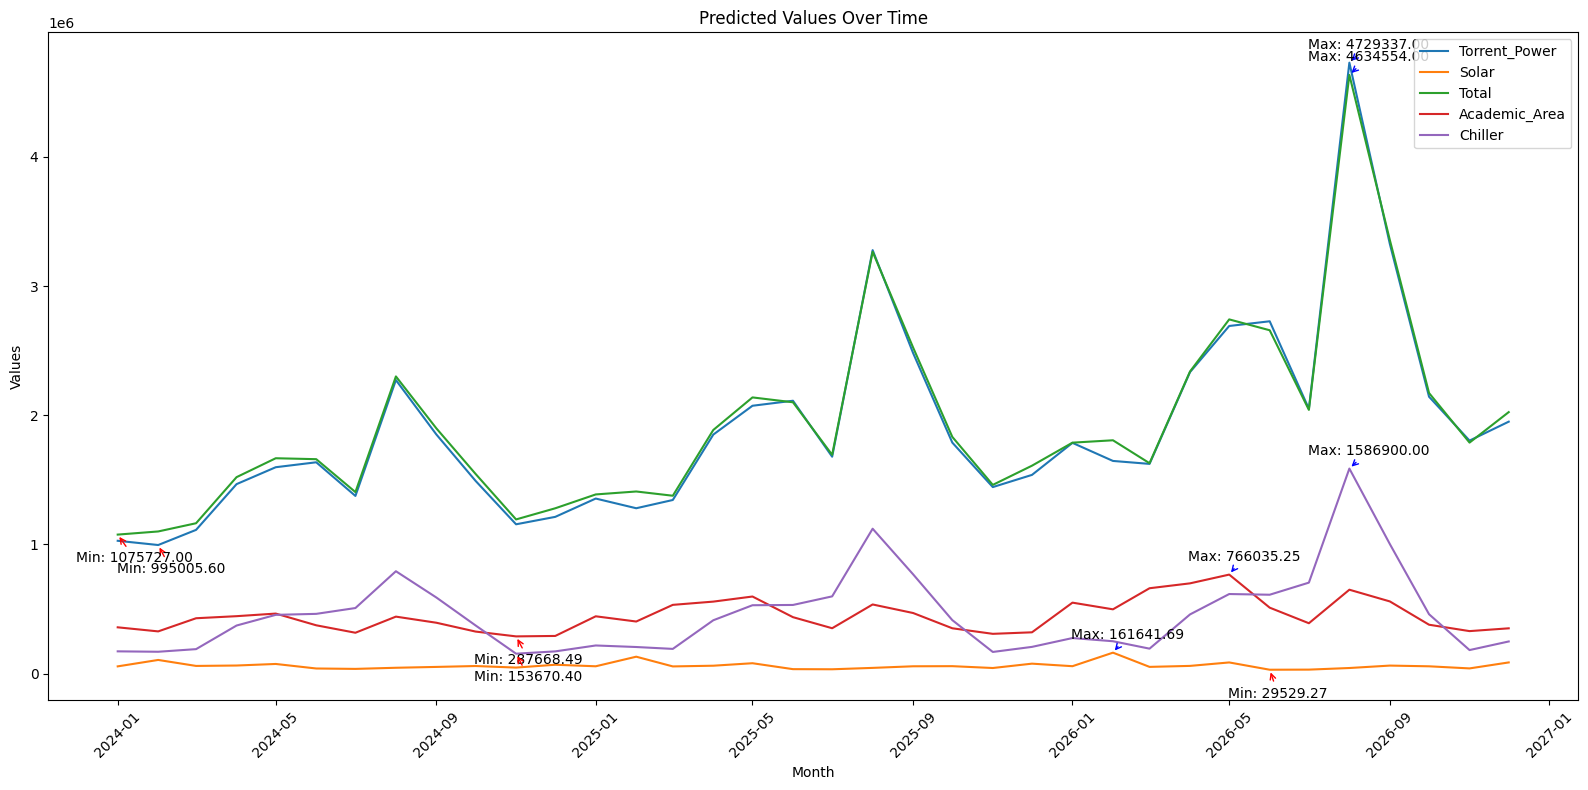

In [ ]:
import matplotlib.pyplot as plt

# Plot the data
plt.figure(figsize=(16, 8))
for column in df_pre.columns[1:]:
    plt.plot(df_pre['Month'], df_pre[column], label=column)

# Find the maximum and minimum values for each column
max_values = df_pre.max()
min_values = df_pre.min()

# Annotate the maximum and minimum values
for column in df_pre.columns[1:]:
    max_val = max_values[column]
    min_val = min_values[column]
    plt.annotate(f'Max: {max_val:.2f}', xy=(df_pre['Month'][df_pre[column] == max_val], max_val),
                 xytext=(-30, 10), textcoords='offset points', arrowprops=dict(arrowstyle='->', color='blue'))
    plt.annotate(f'Min: {min_val:.2f}', xy=(df_pre['Month'][df_pre[column] == min_val], min_val),
                 xytext=(-30, -20), textcoords='offset points', arrowprops=dict(arrowstyle='->', color='red'))

# Add labels and title
plt.xlabel('Month')
plt.ylabel('Values')
plt.title('Predicted Values Over Time')
plt.legend()
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# Show plot
plt.tight_layout()
plt.show()


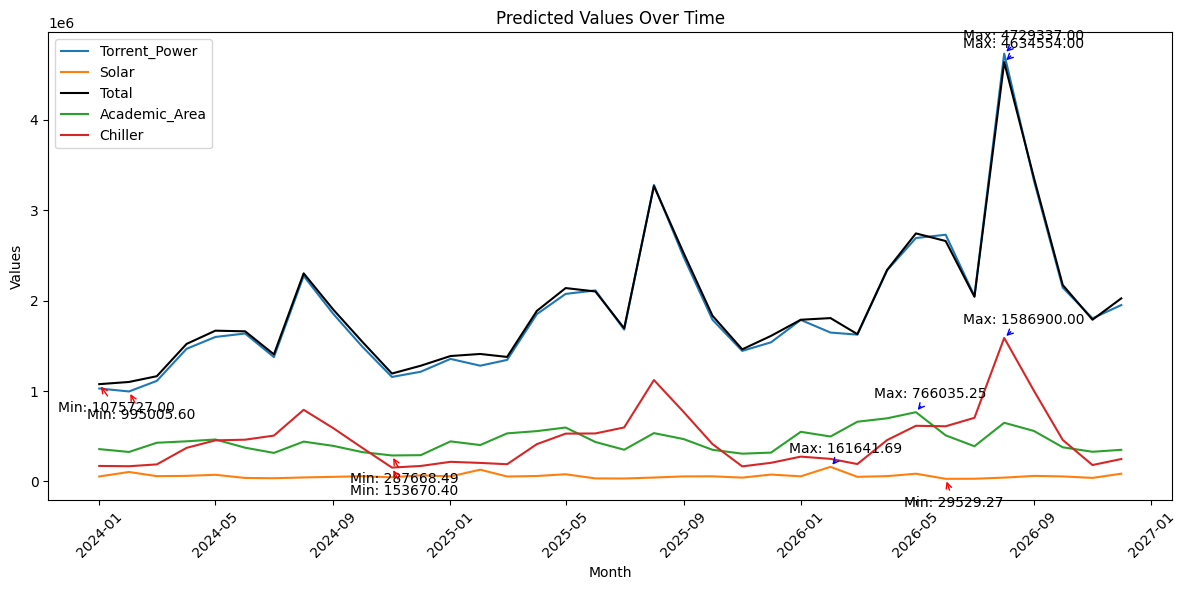

In [ ]:
import matplotlib.pyplot as plt

# Plot the data
plt.figure(figsize=(12, 6))
for column in df_pre.columns[1:]:
    if column == 'Total':
        plt.plot(df_pre['Month'], df_pre[column], label=column, color='black')
    else:
        plt.plot(df_pre['Month'], df_pre[column], label=column)

# Find the maximum and minimum values for each column
max_values = df_pre.max()
min_values = df_pre.min()

# Annotate the maximum and minimum values
for column in df_pre.columns[1:]:
    max_val = max_values[column]
    min_val = min_values[column]
    plt.annotate(f'Max: {max_val:.2f}', xy=(df_pre['Month'][df_pre[column] == max_val], max_val),
                 xytext=(-30, 10), textcoords='offset points', arrowprops=dict(arrowstyle='->', color='blue'))
    plt.annotate(f'Min: {min_val:.2f}', xy=(df_pre['Month'][df_pre[column] == min_val], min_val),
                 xytext=(-30, -20), textcoords='offset points', arrowprops=dict(arrowstyle='->', color='red'))

# Add labels and title
plt.xlabel('Month')
plt.ylabel('Values')
plt.title('Predicted Values Over Time')
plt.legend()
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# Show plot
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd

# Extract the year from the Month column
df_given['Year'] = df_given['Month'].apply(lambda x: int(x.split('-')[1]))

# Group by year and sum the values
df_year = df_given.groupby('Year').sum().reset_index()

print(df_year)


   Year   Torrent   Solar     Total   Hostel  Academic_area  Chiller
0    21   8102300  666859   8769159  2056036        2688617  2570580
1    22  10933755  680216  11613971  2557440        3455759  3033258
2    23  13341525  681331  14022856  2675243        3746458  3649022


<ipython-input-95-1e1895228195>:7: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_year = df_given.groupby('Year').sum().reset_index()


In [ ]:
import numpy as np
import pandas as pd

# Given data
data_year = {
    'Year': [21, 22, 23],
    'Torrent': [8102300, 10933755, 13341525],
    'Solar': [666859, 680216, 681331],
    'Total': [8769159, 11613971, 14022856],
    'Hostel': [2056036, 2557440, 2675243],
    'Academic_area': [2688617, 3455759, 3746458],
    'Chiller': [2570580, 3033258, 3649022]
}

# Convert to DataFrame
df_year = pd.DataFrame(data_year)

# Calculate CAGR for each column
def calculate_cagr(data):
    start_value = data.iloc[0]
    end_value = data.iloc[-1]
    num_years = len(data) - 1
    cagr = (end_value / start_value) ** (1 / num_years) - 1
    return cagr

cagr_values_year = {}
for column in df_year.columns[1:]:
    cagr_values_year[column] = calculate_cagr(df_year[column])

# Projected values for years 24, 25, and 26
num_years_projected = 3
projected_values_year = {}
for column, cagr in cagr_values_year.items():
    start_value = df_year[column].iloc[-1]  # Value for last year
    projected_values_year[column] = [
        start_value * (1 + cagr) ** year for year in range(24, 24 + num_years_projected)
    ]

# Display the calculated values
print("CAGR and Predicted Values for Years 24, 25, 26:")
print("===============================================")
for column in df_year.columns[1:]:
    print(f"{column}:")
    print(f"  CAGR (Year 21-23): {cagr_values_year[column]:.3f}")
    print("  Predicted Values:")
    for i, value in enumerate(projected_values_year[column], start=24):
        print(f"    Year {i}: {value:.2f}")


CAGR and Predicted Values for Years 24, 25, 26:
Torrent:
  CAGR (Year 21-23): 0.283
  Predicted Values:
    Year 24: 5301165120.62
    Year 25: 6802521283.05
    Year 26: 8729080259.42
Solar:
  CAGR (Year 21-23): 0.011
  Predicted Values:
    Year 24: 881551.61
    Year 25: 891065.86
    Year 26: 900682.81
Total:
  CAGR (Year 21-23): 0.265
  Predicted Values:
    Year 24: 3920837381.71
    Year 25: 4958132116.29
    Year 26: 6269853015.90
Hostel:
  CAGR (Year 21-23): 0.141
  Predicted Values:
    Year 24: 63001878.25
    Year 25: 71865385.24
    Year 26: 81975867.05
Academic_area:
  CAGR (Year 21-23): 0.180
  Predicted Values:
    Year 24: 200781642.88
    Year 25: 237011799.39
    Year 26: 279779526.88
Chiller:
  CAGR (Year 21-23): 0.191
  Predicted Values:
    Year 24: 244298483.76
    Year 25: 291067322.09
    Year 26: 346789651.28


CAGR and Predicted Values for Years 24, 25, 26:\
===============================================\
Torrent:\
  CAGR (Year 21-23): 0.132\
  Predicted Values:\
    Year 24: 15155504.61\
    Year 25: 18416342.26\
    Year 26: 22442444.98\
Solar:\
  CAGR (Year 21-23): 0.002\
  Predicted Values:\
    Year 24: 683076.10\
    Year 25: 686589.52\
    Year 26: 690120.76\
Total:\
  CAGR (Year 21-23): 0.136\
  Predicted Values:\
    Year 24: 16604381.79\
    Year 25: 20280331.25\
    Year 26: 24700631.58\
Hostel:\
  CAGR (Year 21-23): 0.100\
  Predicted Values:\
    Year 24: 2928321.88\
    Year 25: 3221153.08\
    Year 26: 3543268.55\
Academic_area:\
  CAGR (Year 21-23): 0.114\
  Predicted Values:\
    Year 24: 4197917.74\
    Year 25: 5048206.23\
    Year 26: 6063614.98\
Chiller:\
  CAGR (Year 21-23): 0.150\
  Predicted Values:\
    Year 24: 4371324.79\
    Year 25: 5427681.53\
    Year 26: 6738979.38\


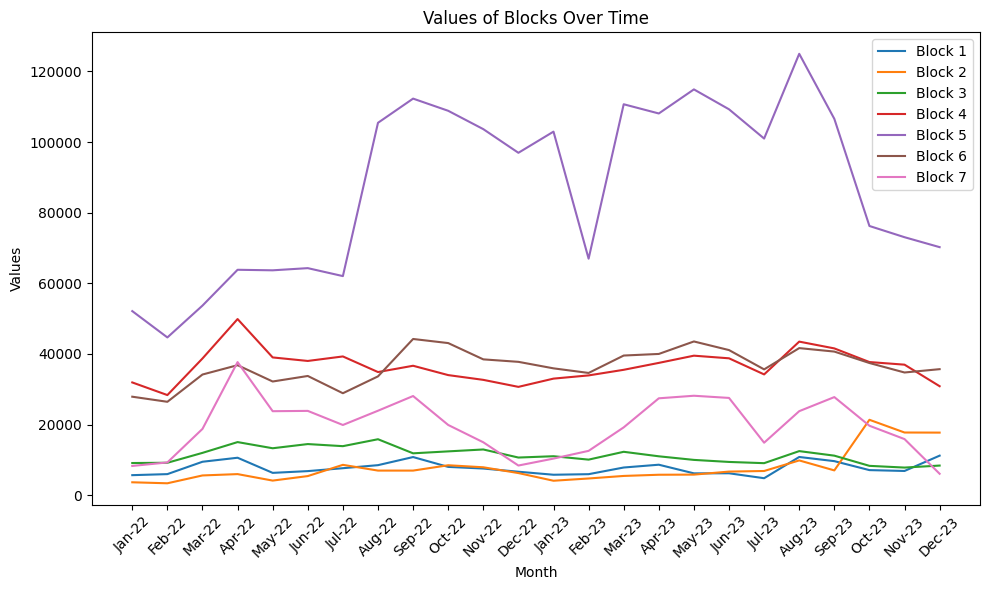

In [ ]:
import matplotlib.pyplot as plt

# Data
month = ['Jan-22', 'Feb-22', 'Mar-22', 'Apr-22', 'May-22', 'Jun-22', 'Jul-22', 'Aug-22', 'Sep-22', 'Oct-22', 'Nov-22', 'Dec-22', 'Jan-23', 'Feb-23', 'Mar-23', 'Apr-23', 'May-23', 'Jun-23', 'Jul-23', 'Aug-23', 'Sep-23', 'Oct-23', 'Nov-23', 'Dec-23']
block_1 = [5678, 5971, 9473, 10611, 6326, 6825, 7647, 8509, 10806, 8018, 7555, 6648, 5796, 5955, 7844, 8635, 6190, 6209, 4814, 10825, 9647, 7108, 6865, 11203]
block_2 = [3660, 3377, 5597, 5976, 4140, 5417, 8600, 6972, 6970, 8483, 7908, 6271, 4097, 4738, 5457, 5795, 5831, 6689, 6857, 9849, 7027, 21356, 17752, 17725]
block_3 = [9113, 9187, 11988, 15042, 13297, 14481, 13888, 15850, 11861, 12412, 12949, 10666, 11039, 10077, 12292, 11017, 9999, 9421, 9073, 12487, 11201, 8315, 7827, 8395]
block_4 = [31931, 28354, 38713, 49876, 39012, 38014, 39291, 34870, 36654, 34009, 32661, 30676, 33012, 33922, 35509, 37465, 39508, 38762, 34203, 43487, 41566, 37702, 36962, 30861]
block_5 = [52126, 44673, 53687, 63830, 63677, 64292, 62039, 105442, 112292, 108844, 103648, 96950, 102942, 66974, 110694, 108082, 114902, 109266, 100982, 124978, 106565, 76229, 73050, 70234]
block_6 = [27891, 26450, 34170, 36814, 32196, 33761, 28873, 33646, 44235, 43076, 38463, 37763, 35920, 34618, 39547, 39998, 43533, 41092, 35628, 41651, 40669, 37432, 34746, 35689]
block_7 = [8286, 9282, 18774, 37691, 23787, 23876, 19885, 23922, 28083, 19891, 14986, 8404, 10369, 12560, 19210, 27438, 28162, 27546, 14867, 23794, 27782, 19669, 15890, 6070]

# Plot
plt.figure(figsize=(10, 6))

# Plot each block
plt.plot(month, block_1, label='Block 1')
plt.plot(month, block_2, label='Block 2')
plt.plot(month, block_3, label='Block 3')
plt.plot(month, block_4, label='Block 4')
plt.plot(month, block_5, label='Block 5')
plt.plot(month, block_6, label='Block 6')
plt.plot(month, block_7, label='Block 7')

# Add labels and title
plt.xlabel('Month')
plt.ylabel('Values')
plt.title('Values of Blocks Over Time')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend()

# Show plot
plt.tight_layout()
plt.show()


Temprature change of gandhinagar (for 6th march 2024)

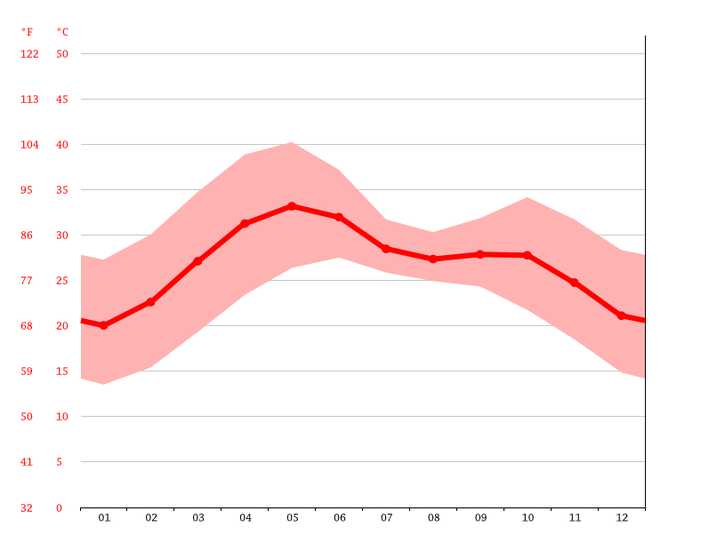

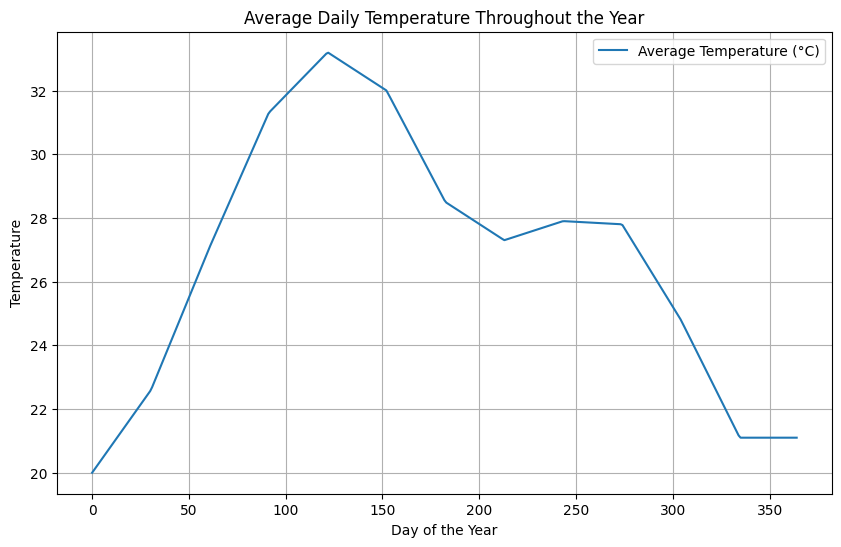

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Monthly average temperatures in Celsius
avg_temperatures_C = [20.0, 22.6, 27.1, 31.3, 33.2, 32.0, 28.5, 27.3, 27.9, 27.8, 24.8, 21.1]

# Convert Celsius to Fahrenheit for plotting if needed
avg_temperatures_F = [(temp * 9/5) + 32 for temp in avg_temperatures_C]

# Create an array of days from 0 to 365
days = np.linspace(0, 365, num=12, endpoint=False)

# Linearly interpolate temperatures for each day of the year
interpolated_temperatures_C = np.interp(np.arange(365), days, avg_temperatures_C)
interpolated_temperatures_F = [(temp * 9/5) + 32 for temp in interpolated_temperatures_C]

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(interpolated_temperatures_C, label='Average Temperature (°C)')
# plt.plot(interpolated_temperatures_F, label='Average Temperature (°F)')
plt.title('Average Daily Temperature Throughout the Year')
plt.xlabel('Day of the Year')
plt.ylabel('Temperature')
plt.legend()
plt.grid(True)
plt.show()


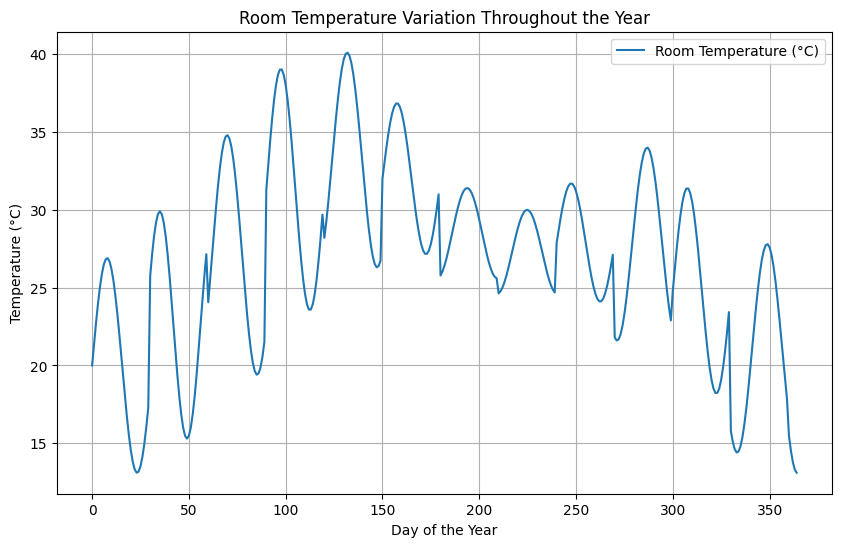

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Monthly min, max, and average temperatures in Celsius
min_temperatures_C = [13.5, 15.4, 19.3, 23.4, 26.4, 27.5, 25.9, 24.9, 24.3, 21.8, 18.5, 14.9]
max_temperatures_C = [27.3, 30.0, 34.7, 38.9, 40.2, 37.2, 31.7, 30.3, 31.9, 34.2, 31.7, 28.3]
avg_temperatures_C = [20.0, 22.6, 27.1, 31.3, 33.2, 32.0, 28.5, 27.3, 27.9, 27.8, 24.8, 21.1]

# Days in each month
days_in_month = [31, 28, 31, 30, 31, 30, 31, 31, 30, 31, 30, 31]

# Generate the number of days from 0 to 364 (for one year)
days = np.arange(0, 365)

# Function to simulate room temperature variation
def room_temperature_variation(day):
    month_index = int(day / 30) % 12  # Correctly handle the month index
    min_temp = min_temperatures_C[month_index]
    max_temp = max_temperatures_C[month_index]
    avg_temp = avg_temperatures_C[month_index]
    days_in_current_month = days_in_month[month_index]
    angle = (2 * np.pi * day) / days_in_current_month  # Angle for sine wave
    return avg_temp + (max_temp - min_temp) * np.sin(angle) / 2  # Simulate sinusoidal variation

# Calculate room temperature variation for each day
room_temperatures = [room_temperature_variation(day) for day in days]

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(room_temperatures, label='Room Temperature (°C)')
plt.title('Room Temperature Variation Throughout the Year')
plt.xlabel('Day of the Year')
plt.ylabel('Temperature (°C)')
plt.grid(True)
plt.legend()
plt.show()


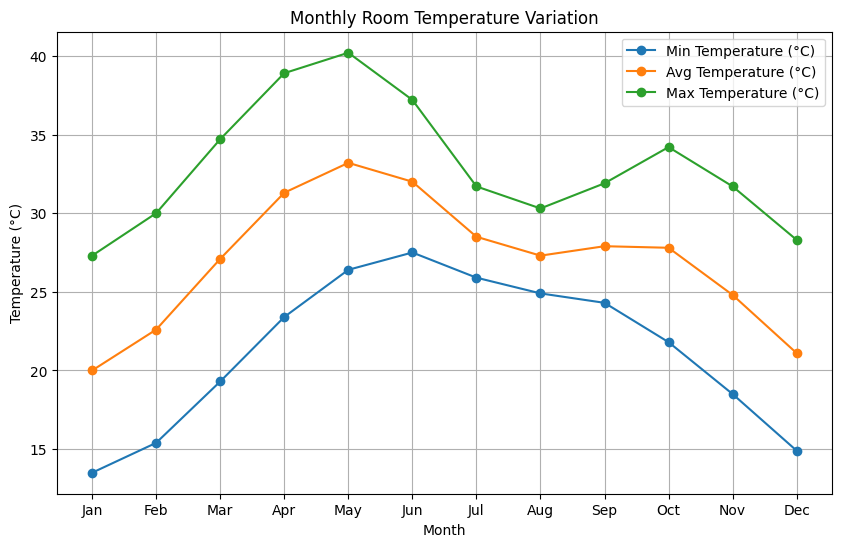

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Monthly min, max, and average temperatures in Celsius
min_temperatures_C = [13.5, 15.4, 19.3, 23.4, 26.4, 27.5, 25.9, 24.9, 24.3, 21.8, 18.5, 14.9]
max_temperatures_C = [27.3, 30.0, 34.7, 38.9, 40.2, 37.2, 31.7, 30.3, 31.9, 34.2, 31.7, 28.3]
avg_temperatures_C = [20.0, 22.6, 27.1, 31.3, 33.2, 32.0, 28.5, 27.3, 27.9, 27.8, 24.8, 21.1]

# Convert Celsius to Fahrenheit for plotting if needed
min_temperatures_F = [(temp * 9/5) + 32 for temp in min_temperatures_C]
max_temperatures_F = [(temp * 9/5) + 32 for temp in max_temperatures_C]
avg_temperatures_F = [(temp * 9/5) + 32 for temp in avg_temperatures_C]

# Months
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(months, min_temperatures_C, label='Min Temperature (°C)', marker='o')
plt.plot(months, avg_temperatures_C, label='Avg Temperature (°C)', marker='o')
plt.plot(months, max_temperatures_C, label='Max Temperature (°C)', marker='o')
plt.title('Monthly Room Temperature Variation')
plt.xlabel('Month')
plt.ylabel('Temperature (°C)')
plt.grid(True)
plt.legend()
plt.show()


https://hvacbuster.com/temperature-difference-inside-and-outside-house/

Temperature Changes:

At the beginning of the simulation, all room lengths start at the initial temperature of 20°C.
As time progresses, the room temperatures change due to heat transfer between the room and the outside environment.
Rooms with larger lengths may take longer to heat up or cool down compared to smaller rooms, as they have higher thermal mass.


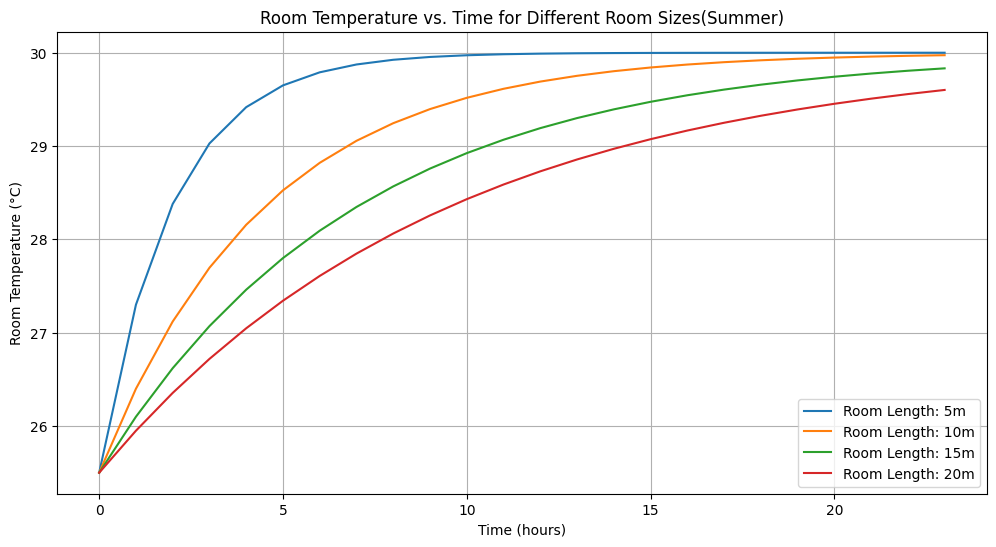

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
room_lengths = np.arange(5, 21, 5)  # Room lengths in meters
room_width = 5  # Room width in meters
room_height = 3  # Room height in meters
initial_temp = (1-0.15)*30  # Initial room temperature in degrees Celsius (15 % of the outside temp)
outside_temp = 30  # Outside temperature in degrees Celsius
time_step = 3600  # Time step for simulation in seconds
thermal_resistance = 0.1  # Thermal resistance of the room in m^2*K/W
heat_capacity = 1000  # Heat capacity of air in J/(kg*K)

# Calculate the thermal mass of the room
room_volume = room_lengths * room_width * room_height
room_mass = room_volume * 1.2  # Assuming air density of 1.2 kg/m^3

# Simulation
time = np.arange(0, 24 * 3600, time_step)  # 24 hours in seconds
room_temps = np.zeros((len(room_lengths), len(time)))
room_temps[:, 0] = initial_temp

for i, length in enumerate(room_lengths):
    for j in range(1, len(time)):
        # Calculate heat transfer
        delta_temp = room_temps[i, j - 1] - outside_temp
        heat_flow = delta_temp / thermal_resistance
        heat_loss = heat_flow * time_step

        # Calculate new room temperature
        room_temps[i, j] = room_temps[i, j - 1] - (heat_loss / (room_mass[i] * heat_capacity))

# Plotting
plt.figure(figsize=(12, 6))
for i, length in enumerate(room_lengths):
    plt.plot(time / 3600, room_temps[i, :], label=f'Room Length: {length}m')
plt.xlabel('Time (hours)')
plt.ylabel('Room Temperature (°C)')
plt.title('Room Temperature vs. Time for Different Room Sizes(Summer)')
plt.legend()
plt.grid(True)
plt.show()


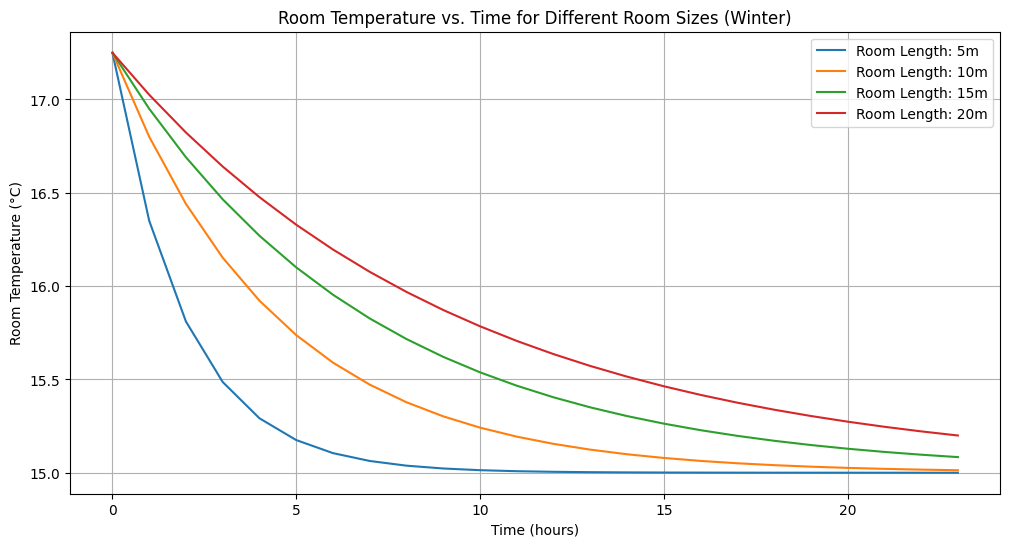

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
room_lengths = np.arange(5, 21, 5)  # Room lengths in meters
room_width = 5  # Room width in meters
room_height = 3  # Room height in meters
initial_temp = (1 + 0.15) * 15  # Initial room temperature in degrees Celsius (15 % more than the outside temp)
outside_temp = 15  # Outside temperature in degrees Celsius
time_step = 3600  # Time step for simulation in seconds
thermal_resistance = 0.1  # Thermal resistance of the room in m^2*K/W
heat_capacity = 1000  # Heat capacity of air in J/(kg*K)

# Calculate the thermal mass of the room
room_volume = room_lengths * room_width * room_height
room_mass = room_volume * 1.2  # Assuming air density of 1.2 kg/m^3

# Simulation
time = np.arange(0, 24 * 3600, time_step)  # 24 hours in seconds
room_temps = np.zeros((len(room_lengths), len(time)))
room_temps[:, 0] = initial_temp

for i, length in enumerate(room_lengths):
    for j in range(1, len(time)):
        # Calculate heat transfer
        delta_temp = room_temps[i, j - 1] - outside_temp
        heat_flow = delta_temp / thermal_resistance
        heat_loss = heat_flow * time_step

        # Calculate new room temperature
        room_temps[i, j] = room_temps[i, j - 1] - (heat_loss / (room_mass[i] * heat_capacity))

# Plotting
plt.figure(figsize=(12, 6))
for i, length in enumerate(room_lengths):
    plt.plot(time / 3600, room_temps[i, :], label=f'Room Length: {length}m')
plt.xlabel('Time (hours)')
plt.ylabel('Room Temperature (°C)')
plt.title('Room Temperature vs. Time for Different Room Sizes (Winter)')
plt.legend()
plt.grid(True)
plt.show()


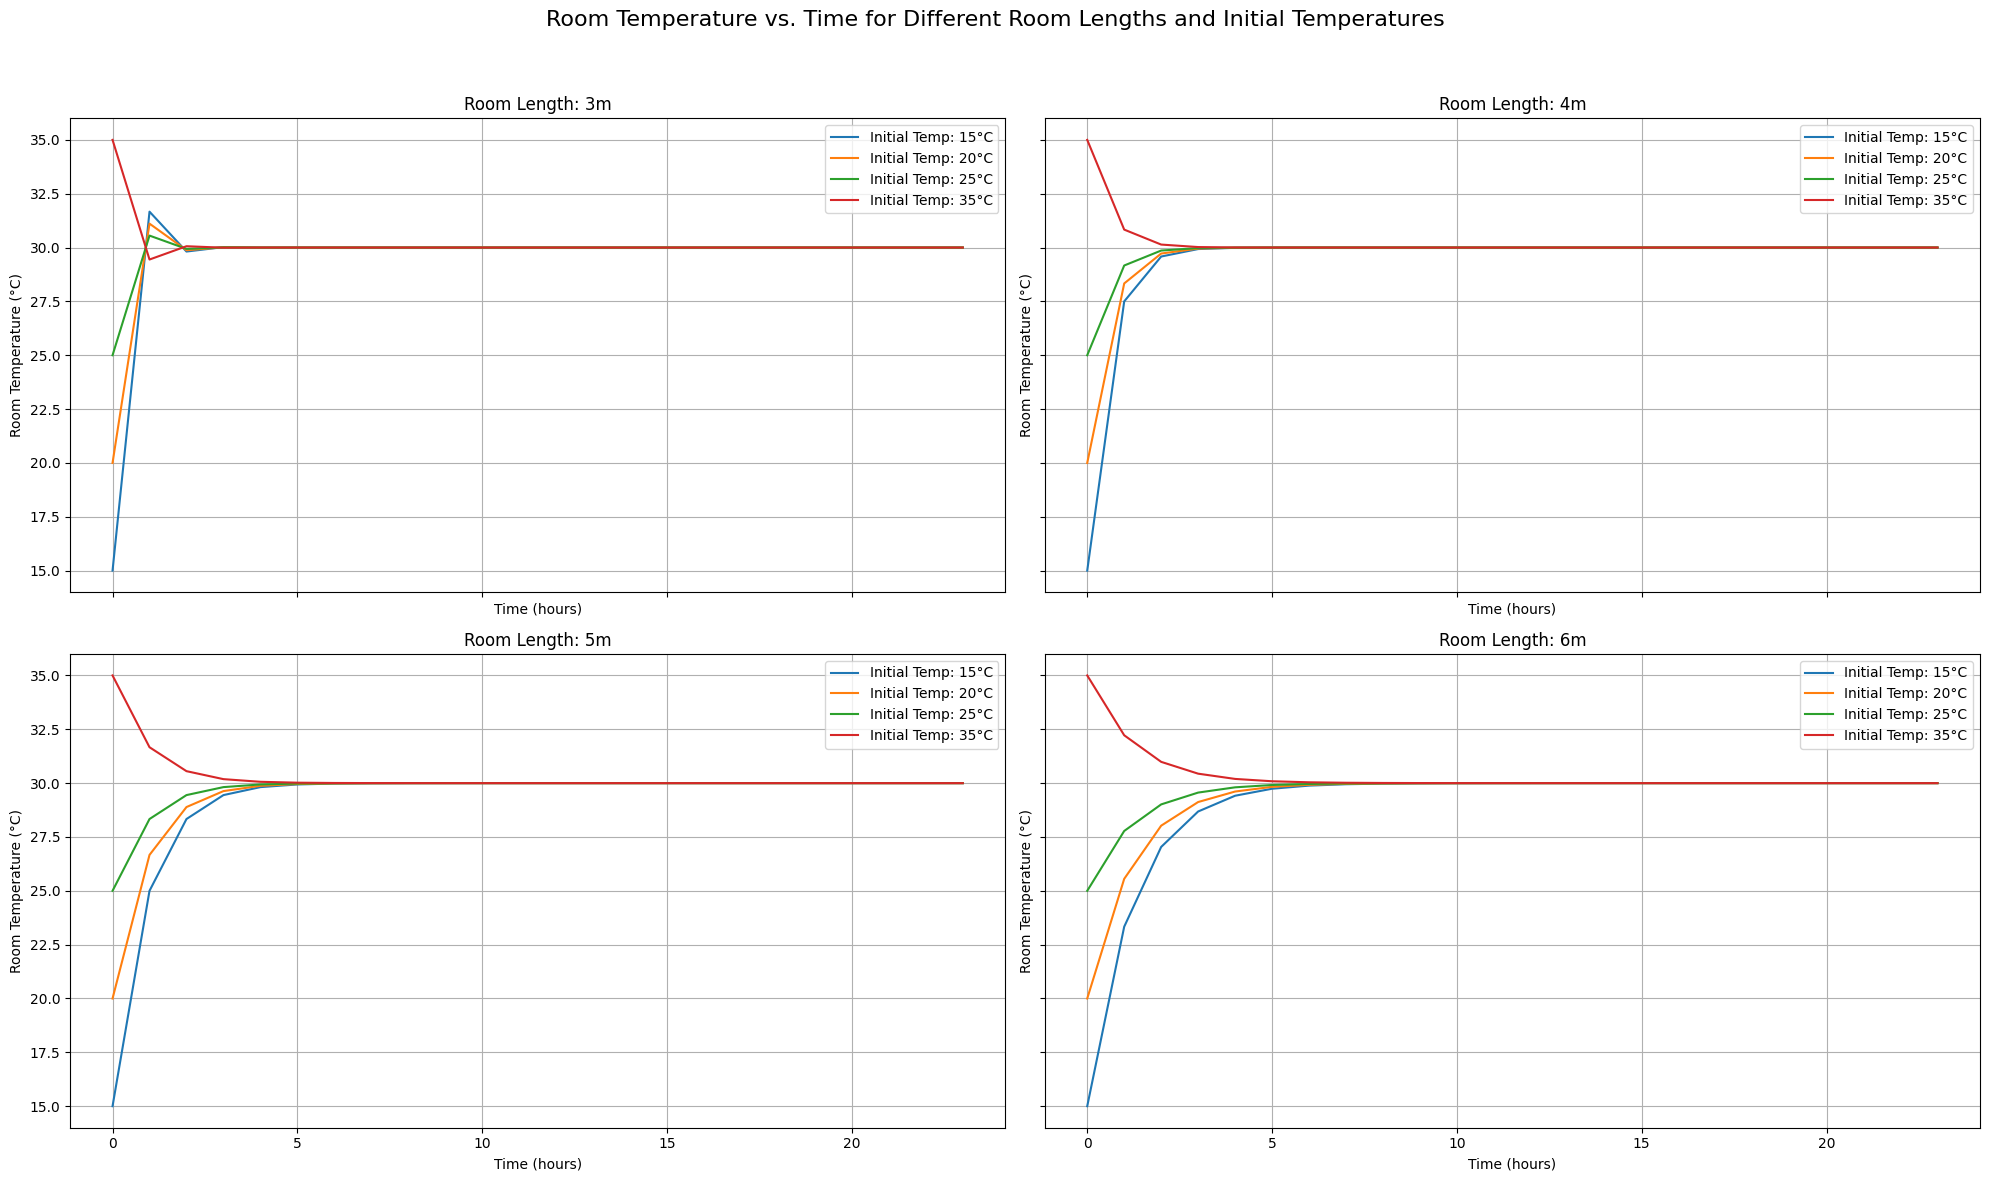

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
room_lengths = np.array([3, 4, 5, 6])  # Room lengths in meters
room_width = 3  # Room width in meters
room_height = 3  # Room height in meters
initial_temps = np.array([15, 20, 25, 35])  # Initial room temperatures in degrees Celsius (excluding 30°C)
outside_temp = 30  # Outside temperature in degrees Celsius
time_step = 3600  # Time step for simulation in seconds
thermal_resistance = 0.1  # Thermal resistance of the room in m^2*K/W
heat_capacity = 1000  # Heat capacity of air in J/(kg*K)

# Calculate the thermal mass of the room
room_volume = room_lengths * room_width * room_height
room_mass = room_volume * 1.2  # Assuming air density of 1.2 kg/m^3

# Simulation
time = np.arange(0, 24 * 3600, time_step)  # 24 hours in seconds
room_temps = np.zeros((len(room_lengths), len(initial_temps), len(time)))

for i, length in enumerate(room_lengths):
    for k, initial_temp in enumerate(initial_temps):
        room_temps[i, k, 0] = initial_temp
        for j in range(1, len(time)):
            # Calculate heat transfer
            delta_temp = room_temps[i, k, j - 1] - outside_temp
            heat_flow = delta_temp / thermal_resistance
            heat_loss = heat_flow * time_step

            # Calculate new room temperature
            room_temps[i, k, j] = room_temps[i, k, j - 1] - (heat_loss / (room_mass[i] * heat_capacity))

# Plotting
fig, axs = plt.subplots(2, 2, figsize=(20, 12), sharex=True, sharey=True)
for i in range(2):
    for j in range(2):
        idx = i * 2 + j
        for k, initial_temp in enumerate(initial_temps):
            axs[i, j].plot(time / 3600, room_temps[idx, k, :], label=f'Initial Temp: {initial_temp}°C')
        axs[i, j].set_title(f'Room Length: {room_lengths[idx]}m')
        axs[i, j].legend()
        axs[i, j].grid(True)
        axs[i, j].set_xlabel('Time (hours)')
        axs[i, j].set_ylabel('Room Temperature (°C)')
plt.suptitle('Room Temperature vs. Time for Different Room Lengths and Initial Temperatures', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


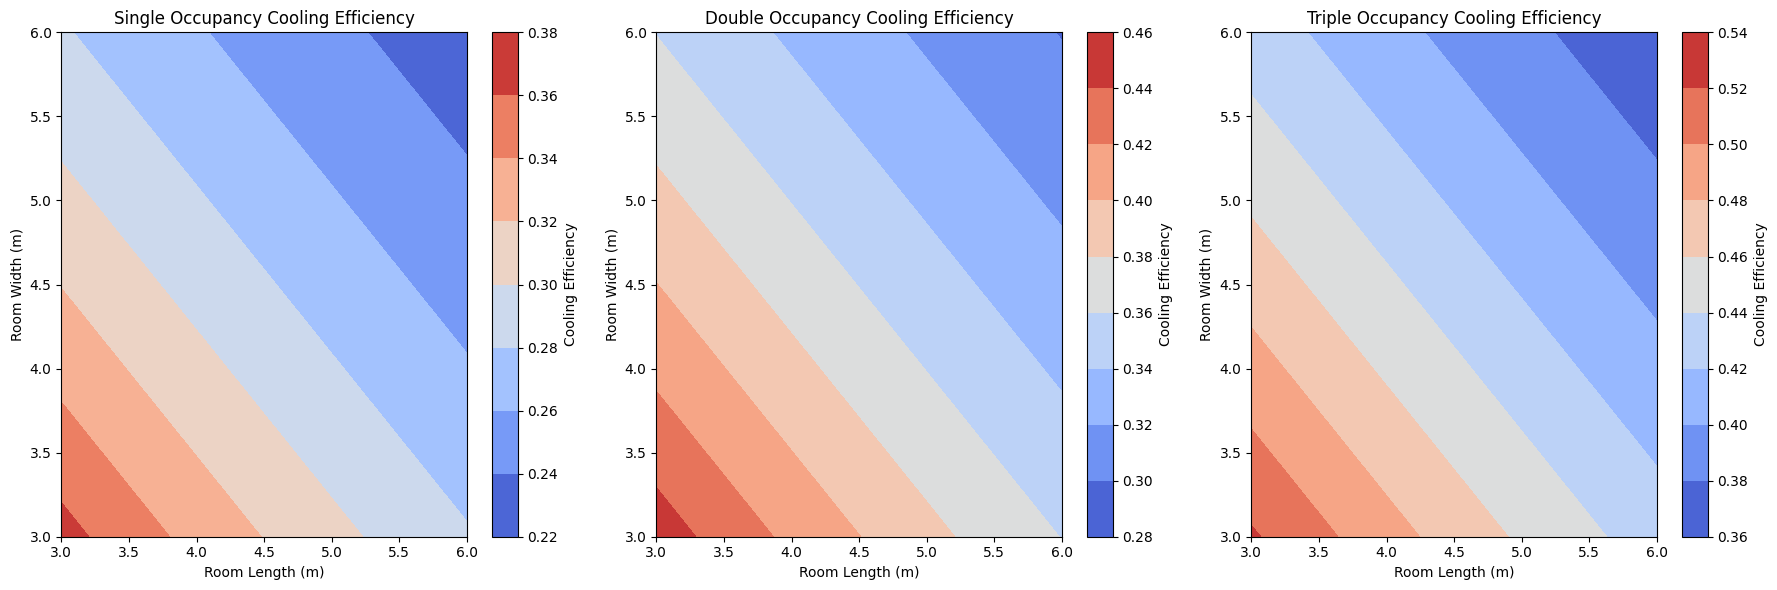

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
room_height = 3  # Room height in meters
thermal_conductivity = 1  # Thermal conductivity of walls in W/(m*K)
wall_thickness = 0.2  # Thickness of walls in meters
convective_coefficient = 10  # Convective heat transfer coefficient in W/(m^2*K)
occupant_heat_generation = 100  # Heat generated by each occupant in watts
outside_temp = 35  # Outside temperature in °C
target_temp = 27  # Target room temperature in °C

# Power consumption of fans, tube lights, and AC for different occupancy scenarios
occupancy_scenarios = {
    'Single': {
        'fan_power': 70,
        'num_fans': 1,
        'tube_light_power': 20,
        'num_tube_lights': 2,
        'ac_power': 0.75 * 3500
    },
    'Double': {
        'fan_power': 70,
        'num_fans': 2,
        'tube_light_power': 20,
        'num_tube_lights': 2,
        'ac_power': 1.1 * 3500
    },
    'Triple': {
        'fan_power': 70,
        'num_fans': 2,
        'tube_light_power': 20,
        'num_tube_lights': 2,
        'ac_power': 1.5 * 3500
    }
}

# Range of room dimensions to simulate
room_lengths = np.arange(3, 7, 1)  # Room lengths in meters
room_widths = np.arange(3, 7, 1)  # Room widths in meters

# Initialize arrays to store results
cooling_efficiencies = np.zeros((len(occupancy_scenarios), len(room_lengths), len(room_widths)))

# Simulation for different occupancy scenarios
for occ_idx, (occ_name, occ_values) in enumerate(occupancy_scenarios.items()):
    for i, length in enumerate(room_lengths):
        for j, width in enumerate(room_widths):
            # Calculate surface area of walls
            wall_area = 2 * room_height * (length + width)

            # Calculate heat transfer rates
            conduction_rate = thermal_conductivity * wall_area * (outside_temp - target_temp) / wall_thickness
            convective_rate = convective_coefficient * wall_area * (outside_temp - target_temp)
            occupant_heat = occupant_heat_generation * (occ_idx + 1)
            fan_heat = occ_values['num_fans'] * occ_values['fan_power']
            tube_light_heat = occ_values['num_tube_lights'] * occ_values['tube_light_power']
            ac_heat = occ_values['ac_power']

            # Total heat transfer rate
            total_heat_transfer = conduction_rate + convective_rate + occupant_heat + fan_heat + tube_light_heat + ac_heat

            # Cooling efficiency
            cooling_efficiency = ac_heat / total_heat_transfer
            cooling_efficiencies[occ_idx, i, j] = cooling_efficiency

# Plotting
fig, axs = plt.subplots(1, len(occupancy_scenarios), figsize=(18, 6))

for occ_idx, (occ_name, _) in enumerate(occupancy_scenarios.items()):
    cs = axs[occ_idx].contourf(room_lengths, room_widths, cooling_efficiencies[occ_idx].T, cmap='coolwarm')
    fig.colorbar(cs, ax=axs[occ_idx], label='Cooling Efficiency')
    axs[occ_idx].set_title(f'{occ_name} Occupancy Cooling Efficiency')
    axs[occ_idx].set_xlabel('Room Length (m)')
    axs[occ_idx].set_ylabel('Room Width (m)')

plt.tight_layout()
plt.show()


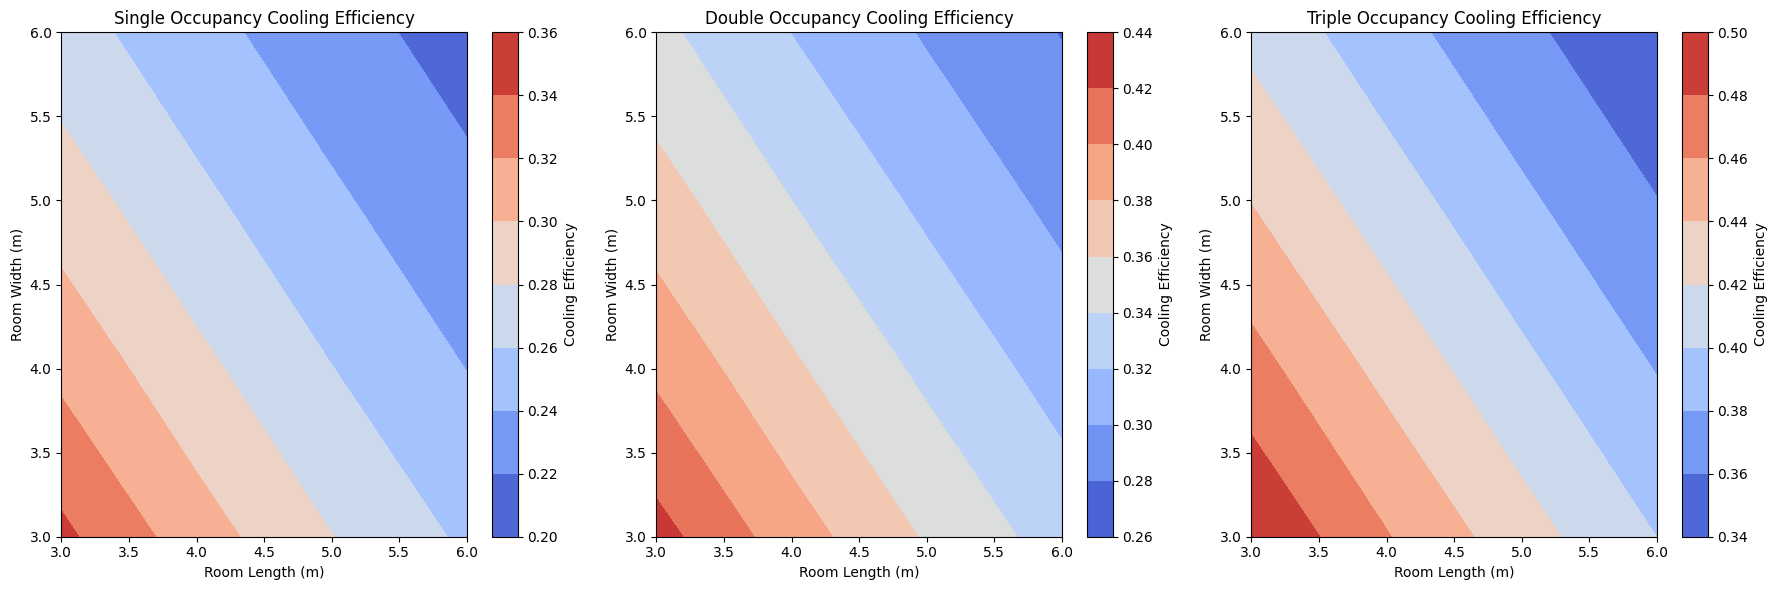

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
room_height = 3  # Room height in meters
thermal_conductivity = 1  # Thermal conductivity of walls in W/(m*K)
wall_thickness = 0.2  # Thickness of walls in meters
convective_coefficient = 10  # Convective heat transfer coefficient in W/(m^2*K)
occupant_heat_generation = 100  # Heat generated by each occupant in watts
outside_temp = 35  # Outside temperature in °C
target_temp = 27  # Target room temperature in °C
sigma = 5.67e-8  # Stefan-Boltzmann constant in W/(m^2*K^4)
solar_radiation = 1000  # Solar radiation in W/m^2

# Power consumption of fans, tube lights, and AC for different occupancy scenarios
occupancy_scenarios = {
    'Single': {
        'fan_power': 70,
        'num_fans': 1,
        'tube_light_power': 20,
        'num_tube_lights': 2,
        'ac_power': 0.75 * 3500
    },
    'Double': {
        'fan_power': 70,
        'num_fans': 2,
        'tube_light_power': 20,
        'num_tube_lights': 2,
        'ac_power': 1.1 * 3500
    },
    'Triple': {
        'fan_power': 70,
        'num_fans': 2,
        'tube_light_power': 20,
        'num_tube_lights': 2,
        'ac_power': 1.5 * 3500
    }
}

# Range of room dimensions to simulate
room_lengths = np.arange(3, 7, 1)  # Room lengths in meters
room_widths = np.arange(3, 7, 1)  # Room widths in meters

# Initialize arrays to store results
cooling_efficiencies = np.zeros((len(occupancy_scenarios), len(room_lengths), len(room_widths)))

# Simulation for different occupancy scenarios
for occ_idx, (occ_name, occ_values) in enumerate(occupancy_scenarios.items()):
    for i, length in enumerate(room_lengths):
        for j, width in enumerate(room_widths):
            # Calculate surface area of walls
            wall_area = 2 * room_height * (length + width)

            # Calculate heat transfer rates
            conduction_rate = thermal_conductivity * wall_area * (outside_temp - target_temp) / wall_thickness
            convective_rate = convective_coefficient * wall_area * (outside_temp - target_temp)
            occupant_heat = occupant_heat_generation * (occ_idx + 1)
            fan_heat = occ_values['num_fans'] * occ_values['fan_power']
            tube_light_heat = occ_values['num_tube_lights'] * occ_values['tube_light_power']
            ac_heat = occ_values['ac_power']

            # Calculate solar heat gain for the sun-facing wall
            solar_heat_flux = sigma * ((outside_temp + 273.15)**4 - (target_temp + 273.15)**4)  # Convert temperature to Kelvin
            solar_wall_area = room_height * length  # Assuming the longest wall is sun-facing
            solar_heat_gain = solar_heat_flux * solar_wall_area

            # Total heat transfer rate
            total_heat_transfer = conduction_rate + convective_rate + occupant_heat + fan_heat + tube_light_heat + ac_heat + solar_heat_gain

            # Cooling efficiency
            cooling_efficiency = ac_heat / total_heat_transfer
            cooling_efficiencies[occ_idx, i, j] = cooling_efficiency

# Plotting
fig, axs = plt.subplots(1, len(occupancy_scenarios), figsize=(18, 6))

for occ_idx, (occ_name, _) in enumerate(occupancy_scenarios.items()):
    cs = axs[occ_idx].contourf(room_lengths, room_widths, cooling_efficiencies[occ_idx].T, cmap='coolwarm')
    fig.colorbar(cs, ax=axs[occ_idx], label='Cooling Efficiency')
    axs[occ_idx].set_title(f'{occ_name} Occupancy Cooling Efficiency')
    axs[occ_idx].set_xlabel('Room Length (m)')
    axs[occ_idx].set_ylabel('Room Width (m)')

plt.tight_layout()
plt.show()


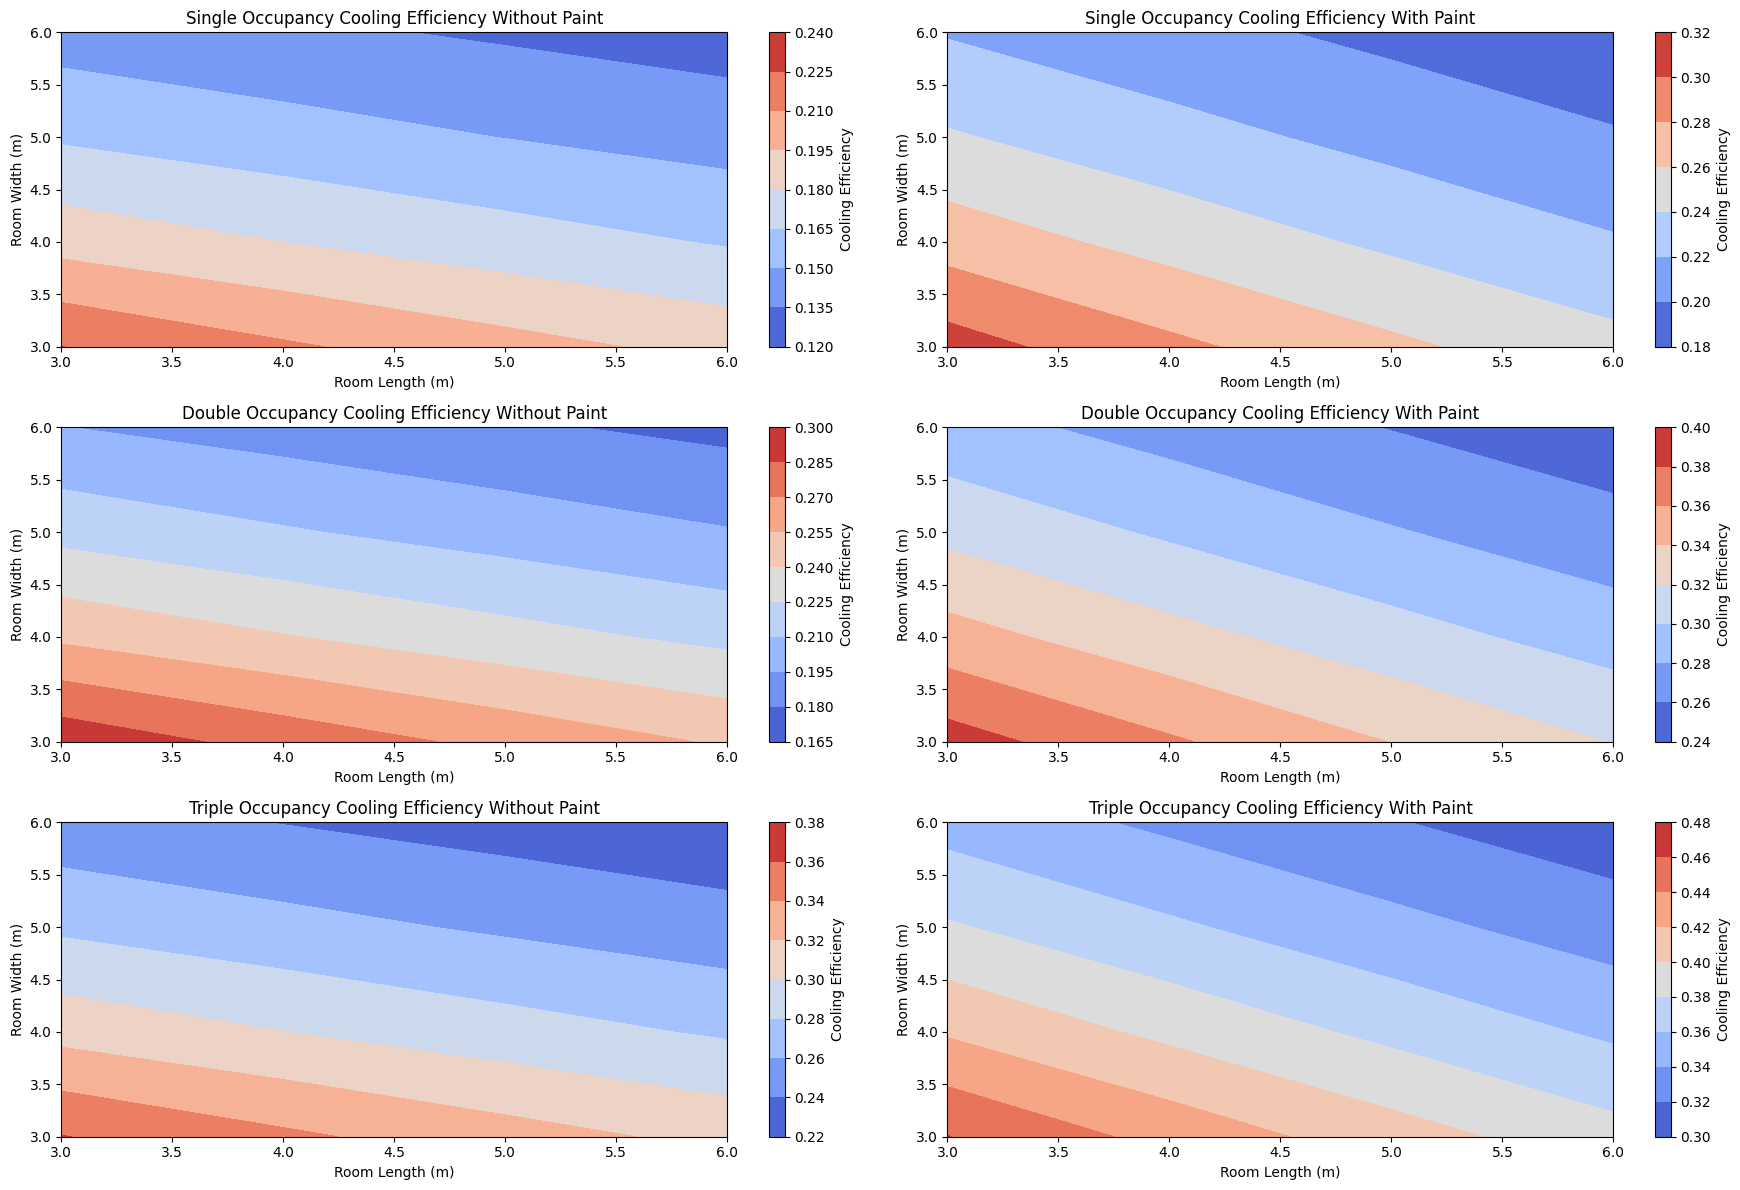

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
room_height = 3  # Room height in meters
thermal_conductivity = 1  # Thermal conductivity of walls in W/(m*K)
wall_thickness = 0.2  # Thickness of walls in meters
convective_coefficient = 10  # Convective heat transfer coefficient in W/(m^2*K)
occupant_heat_generation = 100  # Heat generated by each occupant in watts
outside_temp = 35  # Outside temperature in °C
target_temp = 27  # Target room temperature in °C
sun_radiation = 500  # Solar radiation on the wall facing the sun in W/m^2
reflection_factor = 0.7  # Reflection factor of the paint on the exposed wall

# Power consumption of fans, tube lights, and AC for different occupancy scenarios
occupancy_scenarios = {
    'Single': {
        'fan_power': 70,
        'num_fans': 1,
        'tube_light_power': 20,
        'num_tube_lights': 2,
        'ac_power': 0.75 * 3500
    },
    'Double': {
        'fan_power': 70,
        'num_fans': 2,
        'tube_light_power': 20,
        'num_tube_lights': 2,
        'ac_power': 1.1 * 3500
    },
    'Triple': {
        'fan_power': 70,
        'num_fans': 2,
        'tube_light_power': 20,
        'num_tube_lights': 2,
        'ac_power': 1.5 * 3500
    }
}

# Range of room dimensions to simulate
room_lengths = np.arange(3, 7, 1)  # Room lengths in meters
room_widths = np.arange(3, 7, 1)  # Room widths in meters

# Initialize arrays to store results
cooling_efficiencies_without_paint = np.zeros((len(occupancy_scenarios), len(room_lengths), len(room_widths)))
cooling_efficiencies_with_paint = np.zeros((len(occupancy_scenarios), len(room_lengths), len(room_widths)))

# Simulation for different occupancy scenarios
for occ_idx, (occ_name, occ_values) in enumerate(occupancy_scenarios.items()):
    for i, length in enumerate(room_lengths):
        for j, width in enumerate(room_widths):
            # Calculate surface area of walls
            wall_area = 2 * room_height * (length + width)

            # Calculate heat transfer rates without paint
            conduction_rate_without_paint = thermal_conductivity * wall_area * (outside_temp - target_temp) / wall_thickness
            convective_rate_without_paint = convective_coefficient * wall_area * (outside_temp - target_temp)
            occupant_heat = occupant_heat_generation * (occ_idx + 1)
            fan_heat = occ_values['num_fans'] * occ_values['fan_power']
            tube_light_heat = occ_values['num_tube_lights'] * occ_values['tube_light_power']
            ac_heat = occ_values['ac_power']

            # Additional heat transfer due to sun radiation on the exposed wall without paint
            sun_heat_without_paint = sun_radiation * width * room_height

            # Total heat transfer rate without paint
            total_heat_transfer_without_paint = conduction_rate_without_paint + convective_rate_without_paint + occupant_heat + fan_heat + tube_light_heat + ac_heat + sun_heat_without_paint

            # Cooling efficiency without paint
            cooling_efficiency_without_paint = ac_heat / total_heat_transfer_without_paint
            cooling_efficiencies_without_paint[occ_idx, i, j] = cooling_efficiency_without_paint

            # Additional heat transfer due to sun radiation on the exposed wall with paint
            sun_heat_with_paint = sun_radiation * width * room_height * (1 - reflection_factor)

            # Total heat transfer rate with paint
            total_heat_transfer_with_paint = conduction_rate_without_paint + convective_rate_without_paint + occupant_heat + fan_heat + tube_light_heat + ac_heat + sun_heat_with_paint

            # Cooling efficiency with paint
            cooling_efficiency_with_paint = ac_heat / total_heat_transfer_with_paint
            cooling_efficiencies_with_paint[occ_idx, i, j] = cooling_efficiency_with_paint

# Plotting
fig, axs = plt.subplots(len(occupancy_scenarios), 2, figsize=(18, 12))

for occ_idx, (occ_name, _) in enumerate(occupancy_scenarios.items()):
    # Without paint
    cs1 = axs[occ_idx, 0].contourf(room_lengths, room_widths, cooling_efficiencies_without_paint[occ_idx].T, cmap='coolwarm')
    fig.colorbar(cs1, ax=axs[occ_idx, 0], label='Cooling Efficiency')
    axs[occ_idx, 0].set_title(f'{occ_name} Occupancy Cooling Efficiency Without Paint')
    axs[occ_idx, 0].set_xlabel('Room Length (m)')
    axs[occ_idx, 0].set_ylabel('Room Width (m)')

    # With paint
    cs2 = axs[occ_idx, 1].contourf(room_lengths, room_widths, cooling_efficiencies_with_paint[occ_idx].T, cmap='coolwarm')
    fig.colorbar(cs2, ax=axs[occ_idx, 1], label='Cooling Efficiency')
    axs[occ_idx, 1].set_title(f'{occ_name} Occupancy Cooling Efficiency With Paint')
    axs[occ_idx, 1].set_xlabel('Room Length (m)')
    axs[occ_idx, 1].set_ylabel('Room Width (m)')

plt.tight_layout()
plt.show()


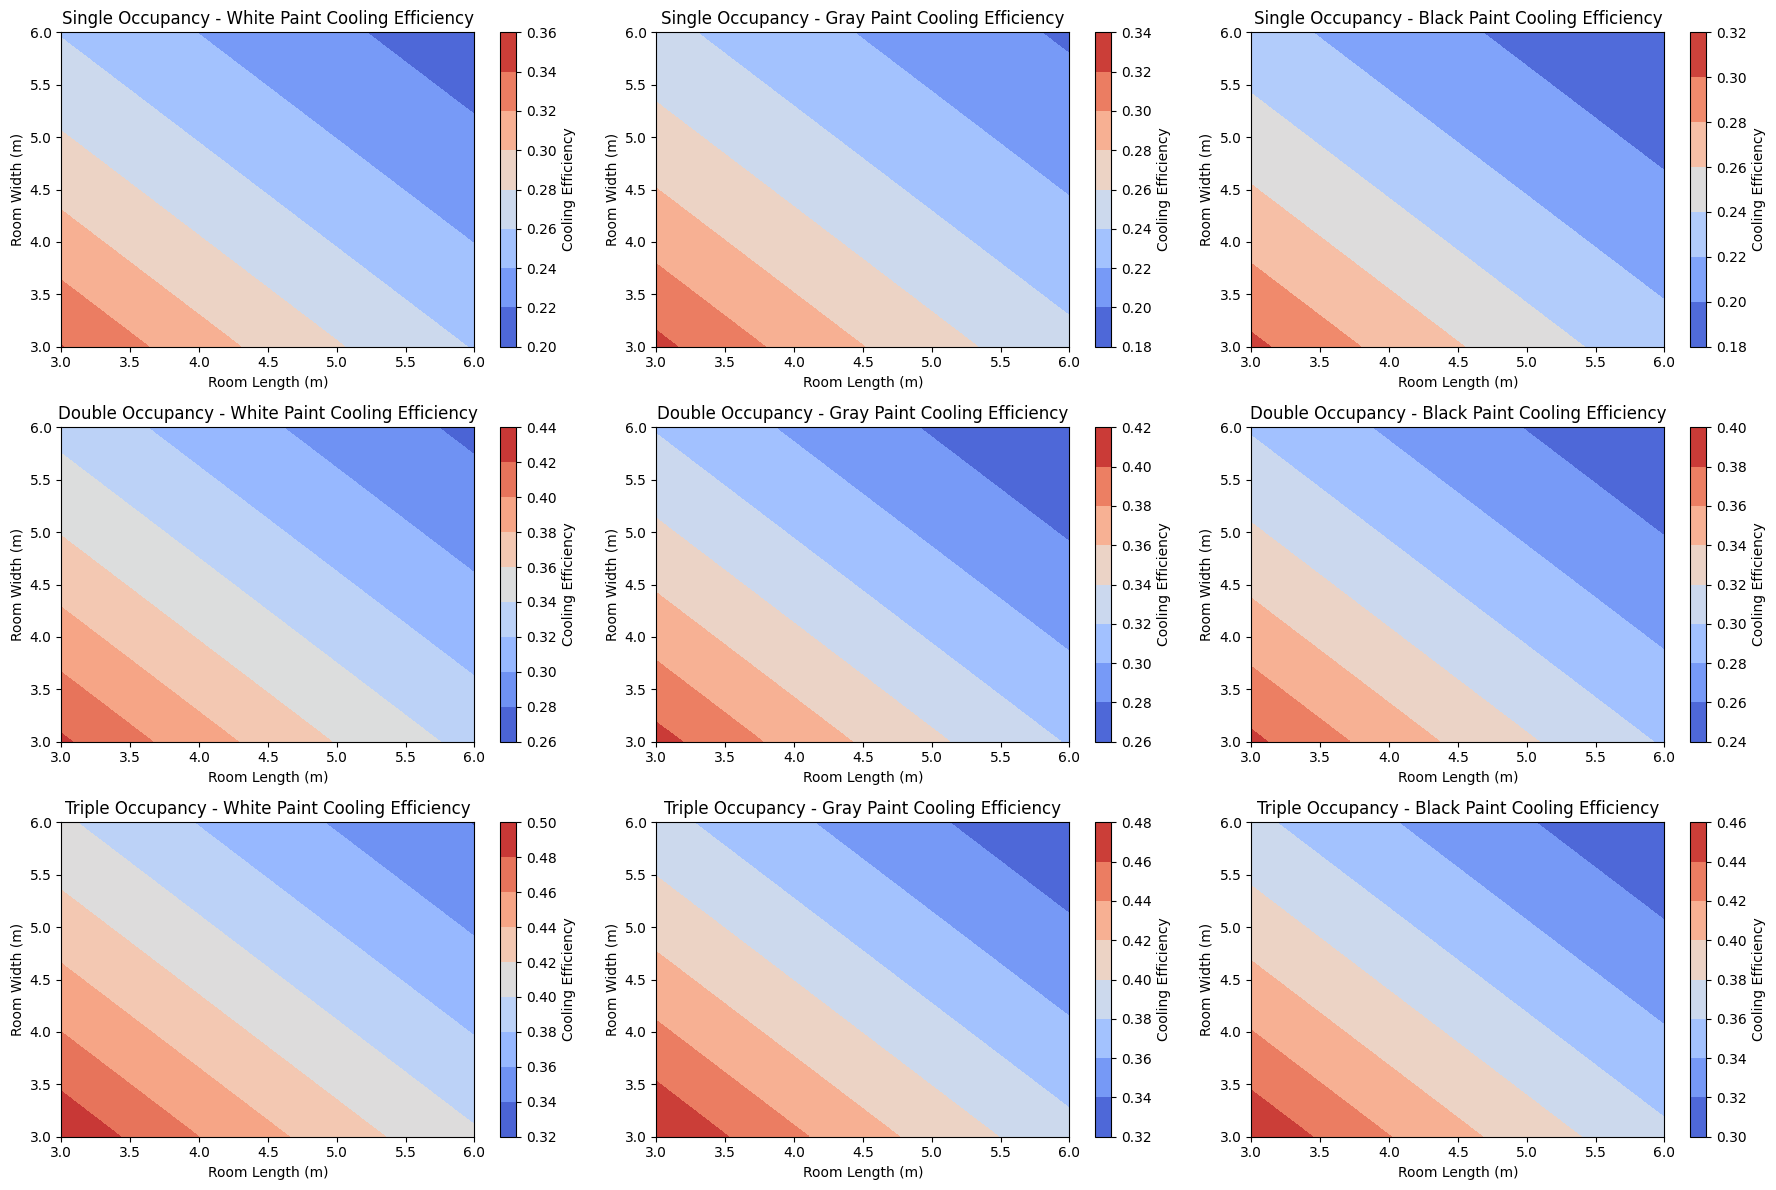

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
room_height = 3  # Room height in meters
thermal_conductivity = 1  # Thermal conductivity of walls in W/(m*K)
wall_thickness = 0.2  # Thickness of walls in meters
convective_coefficient = 10  # Convective heat transfer coefficient in W/(m^2*K)
occupant_heat_generation = 100  # Heat generated by each occupant in watts
outside_temp = 35  # Outside temperature in °C
target_temp = 27  # Target room temperature in °C

# Power consumption of fans, tube lights, and AC for different occupancy scenarios
occupancy_scenarios = {
    'Single': {
        'fan_power': 70,
        'num_fans': 1,
        'tube_light_power': 20,
        'num_tube_lights': 2,
        'ac_power': 0.75 * 3500
    },
    'Double': {
        'fan_power': 70,
        'num_fans': 2,
        'tube_light_power': 20,
        'num_tube_lights': 2,
        'ac_power': 1.1 * 3500
    },
    'Triple': {
        'fan_power': 70,
        'num_fans': 2,
        'tube_light_power': 20,
        'num_tube_lights': 2,
        'ac_power': 1.5 * 3500
    }
}

# Range of room dimensions to simulate
room_lengths = np.arange(3, 7, 1)  # Room lengths in meters
room_widths = np.arange(3, 7, 1)  # Room widths in meters

# Paint properties
paint_colors = {
    'White': {'absorption_coefficient': 0.3, 'thickness': 0.002},
    'Gray': {'absorption_coefficient': 0.5, 'thickness': 0.004},
    'Black': {'absorption_coefficient': 0.8, 'thickness': 0.006}
}

# Initialize arrays to store results
cooling_efficiencies = np.zeros((len(occupancy_scenarios), len(paint_colors), len(room_lengths), len(room_widths)))

# Simulation for different occupancy scenarios and paint colors
for occ_idx, (occ_name, occ_values) in enumerate(occupancy_scenarios.items()):
    for paint_idx, (paint_color, paint_props) in enumerate(paint_colors.items()):
        for i, length in enumerate(room_lengths):
            for j, width in enumerate(room_widths):
                # Calculate surface area of walls
                wall_area = 2 * room_height * (length + width)

                # Calculate heat transfer rates
                conduction_rate = thermal_conductivity * wall_area * (outside_temp - target_temp) / wall_thickness
                convective_rate = convective_coefficient * wall_area * (outside_temp - target_temp)
                occupant_heat = occupant_heat_generation * (occ_idx + 1)
                fan_heat = occ_values['num_fans'] * occ_values['fan_power']
                tube_light_heat = occ_values['num_tube_lights'] * occ_values['tube_light_power']
                ac_heat = occ_values['ac_power']

                # Calculate additional heat transfer due to paint color
                sigma = 5.67e-8  # Stefan-Boltzmann constant
                additional_heat_transfer = sigma * wall_area * paint_props['absorption_coefficient'] * ((outside_temp + 273.15)**4 - (target_temp + 273.15)**4)

                # Total heat transfer rate
                total_heat_transfer = conduction_rate + additional_heat_transfer + convective_rate + occupant_heat + fan_heat + tube_light_heat + ac_heat

                # Cooling efficiency
                cooling_efficiency = ac_heat / total_heat_transfer
                cooling_efficiencies[occ_idx, paint_idx, i, j] = cooling_efficiency

# Plotting
fig, axs = plt.subplots(len(occupancy_scenarios), len(paint_colors), figsize=(18, 12))

for occ_idx, (occ_name, _) in enumerate(occupancy_scenarios.items()):
    for paint_idx, (paint_color, _) in enumerate(paint_colors.items()):
        cs = axs[occ_idx, paint_idx].contourf(room_lengths, room_widths, cooling_efficiencies[occ_idx, paint_idx].T, cmap='coolwarm')
        fig.colorbar(cs, ax=axs[occ_idx, paint_idx], label='Cooling Efficiency')
        axs[occ_idx, paint_idx].set_title(f'{occ_name} Occupancy - {paint_color} Paint Cooling Efficiency')
        axs[occ_idx, paint_idx].set_xlabel('Room Length (m)')
        axs[occ_idx, paint_idx].set_ylabel('Room Width (m)')

plt.tight_layout()
plt.show()
